In [1]:
import ROOT

Welcome to JupyROOT 6.26/04


In [2]:
!ls -ltr

total 50349
-rw-r--r--. 1 migordon 1399   15708 Aug 18  2020 TTto2L2Nu.txt
-rw-r--r--. 1 migordon 1399   41132 Aug 18  2020 TTToSemiLeptonic.txt
-rw-r--r--. 1 migordon 1399   14492 Aug 25  2020 Plots.pdf
-rw-r--r--. 1 migordon 1399   37773 Aug 27  2020 August26.pdf
-rw-r--r--. 1 migordon 1399   34610 Sep  2  2020 FTFunctions.cpp
-rw-r--r--. 1 migordon 1399    5774 Sep 21  2020 RealData
-rw-r--r--. 1 migordon 1399   45563 Sep 23  2020 September9.pdf
-rw-r--r--. 1 migordon 1399   45708 Sep 24  2020 September23MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399   46111 Sep 24  2020 September23RealData.pdf
-rw-r--r--. 1 migordon 1399   48733 Oct  9  2020 October8MonteCarlo.pdf
-rw-r--r--. 1 migordon 1399     926 Oct 20  2020 graph.dot.pdf
-rw-r--r--. 1 migordon 1399  145577 Oct 20  2020 October15.pdf
-rw-r--r--. 1 migordon 1399   49188 Nov 11  2020 October8RealData.pdf
-rw-r--r--. 1 migordon 1399  159946 Nov 23  2020 November12.pdf
-rw-r--r--. 1 migordon 1399  159946 Nov 23  2020 November23.pdf
-rw

In [3]:
!mv Combination.root Combination.root_backup
!hadd -f Combination.root 2018_Mu_Data.root 2018_Mu_MonteCarloTTToSemiLeptonic.root 2018_Mu_MonteCarloTTTo2L2Nu.root 2018_Mu_MonteCarloWJetsToLNu.root 2018_Mu_MonteCarloST_tW_top.root 2018_Mu_MonteCarloST_tchannel_top.root

hadd Target file: Combination.root
hadd compression setting for all output: 1
hadd Source file 1: 2018_Mu_Data.root
hadd Source file 2: 2018_Mu_MonteCarloTTToSemiLeptonic.root
hadd Source file 3: 2018_Mu_MonteCarloTTTo2L2Nu.root
hadd Source file 4: 2018_Mu_MonteCarloWJetsToLNu.root
hadd Source file 5: 2018_Mu_MonteCarloST_tW_top.root
hadd Source file 6: 2018_Mu_MonteCarloST_tchannel_top.root
hadd Target path: Combination.root:/


In [4]:
f = ROOT.TFile.Open('Combination.root', 'read')
k = [ff.GetName() for ff in f.GetListOfKeys()]
print(k)

['2018___Mu___Data___leading_isolated_muon_pt_initial___nominal', '2018___Mu___Data___leading_isolated_muon_eta_initial___nominal', '2018___Mu___Data___leading_isolated_muon_phi_initial___nominal', '2018___Mu___Data___leading_isolated_muon_mass_initial___nominal', '2018___Mu___Data___leading_isolated_muon_charge_initial___nominal', '2018___Mu___Data___leading_isolated_electron_pt_initial___nominal', '2018___Mu___Data___leading_isolated_electron_eta_initial___nominal', '2018___Mu___Data___leading_isolated_electron_phi_initial___nominal', '2018___Mu___Data___leading_isolated_electron_mass_initial___nominal', '2018___Mu___Data___leading_isolated_electron_charge_initial___nominal', '2018___Mu___Data___met_before_met_cut___nominal', '2018___Mu___Data___met_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_pt_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_eta_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_phi_after_met_cut___nominal

In [5]:
eras = list(set([kk.split("___")[0] for kk in k]))
channels = list(set([kk.split("___")[1] for kk in k]))
samples = list(set([kk.split("___")[2] for kk in k]))
variables = list(set([kk.split("___")[3] for kk in k]))
systematics = list(set([kk.split("___")[4] for kk in k]))

In [6]:
print(eras)
print(channels)
print(samples)
print(variables)
print(systematics)

['2018']
['Mu']
['MonteCarloST_tW_top', 'MonteCarloTTTo2L2Nu', 'MonteCarloWJetsToLNu', 'Data', 'MonteCarloTTToSemiLeptonic', 'MonteCarloST_tchannel_top']
['delta_r_between_isolated_and_jpsi_muons', 'leading_isolated_muon_eta_initial', 'isolated_muons_in_range_pfRelIso03_all', 'leading_isolated_electron_mass_initial', 'number_of_jets', 'jpsi_muon_pf_rel_iso_03_all', 'leading_isolated_muon_eta', 'leading_isolated_electron_charge_initial', 'jpsi_muon_pf_iso_id', 'jet2_phi', 'leading_isolated_muon_mass_after_jet_cut', 'leading_isolated_muon_pt_after_jet_cut', 'leading_isolated_muon_phi_initial', 'delta_eta_for_jpsi_muons_in_peak', 'leading_isolated_muon_eta_after_jet_cut', 'leading_isolated_muon_mass_initial', 'jpsi_muon_isolation_in_peak', 'leading_isolated_muon_charge', 'invariant_masses_zoomed', 'jet2_eta', 'leading_isolated_muon_mass', 'isolated_muon_pf_rel_iso_03_all', 'leading_isolated_muon_phi', 'leading_isolated_electron_eta_after_met_cut', 'delta_phi_between_isolated_muon_and_jpsi

In [7]:
def GetHistos(f, era, channel, variable, systematic = "nominal", separator = "___"):
    
    MC = dict()
    Data = dict()
    
    k = [ff.GetName() for ff in f.GetListOfKeys()]
    print(k)
    k = [kk for kk in k if era == kk.split(separator)[0]]
    k = [kk for kk in k if channel == kk.split(separator)[1]]
    k = [kk for kk in k if variable == kk.split(separator)[3]]
    k = [kk for kk in k if systematic == kk.split(separator)[4]]
    
    for kk in k:
        sample = kk.split(separator)[2]
        
        if "data" in sample.lower():
            Data[sample] = f.Get(kk)
            print("Data")
            
        else:
            MC[sample] = f.Get(kk)
            print(sample)
            
    return MC, Data

In [8]:
x, y = GetHistos(f, "2018", "Mu", "mu_pt")
print(x, y)

['2018___Mu___Data___leading_isolated_muon_pt_initial___nominal', '2018___Mu___Data___leading_isolated_muon_eta_initial___nominal', '2018___Mu___Data___leading_isolated_muon_phi_initial___nominal', '2018___Mu___Data___leading_isolated_muon_mass_initial___nominal', '2018___Mu___Data___leading_isolated_muon_charge_initial___nominal', '2018___Mu___Data___leading_isolated_electron_pt_initial___nominal', '2018___Mu___Data___leading_isolated_electron_eta_initial___nominal', '2018___Mu___Data___leading_isolated_electron_phi_initial___nominal', '2018___Mu___Data___leading_isolated_electron_mass_initial___nominal', '2018___Mu___Data___leading_isolated_electron_charge_initial___nominal', '2018___Mu___Data___met_before_met_cut___nominal', '2018___Mu___Data___met_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_pt_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_eta_after_met_cut___nominal', '2018___Mu___Data___leading_isolated_muon_phi_after_met_cut___nominal

In [9]:
#Load histograms from file(s)
MonteCarlo = dict()
RealData = dict()

MonteCarlo["leading_isolated_muon_pt_initial"] = dict()
MonteCarlo["leading_isolated_muon_eta_initial"] = dict()
MonteCarlo["leading_isolated_muon_phi_initial"] = dict()
MonteCarlo["leading_isolated_muon_mass_initial"] = dict()
MonteCarlo["leading_isolated_muon_charge_initial"] = dict()
MonteCarlo["leading_isolated_electron_pt_initial"] = dict()
MonteCarlo["leading_isolated_electron_eta_initial"] = dict()
MonteCarlo["leading_isolated_electron_phi_initial"] = dict()
MonteCarlo["leading_isolated_electron_mass_initial"] = dict()
MonteCarlo["leading_isolated_electron_charge_initial"] = dict()
MonteCarlo["met_before_met_cut"] = dict()
MonteCarlo["met_after_met_cut"] = dict()
MonteCarlo["leading_isolated_muon_pt_after_met_cut"] = dict()
MonteCarlo["leading_isolated_muon_eta_after_met_cut"] = dict()
MonteCarlo["leading_isolated_muon_phi_after_met_cut"] = dict()
MonteCarlo["leading_isolated_muon_mass_after_met_cut"] = dict()
MonteCarlo["leading_isolated_muon_charge_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_pt_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_eta_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_phi_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_mass_after_met_cut"] = dict()
MonteCarlo["leading_isolated_electron_charge_after_met_cut"] = dict()
MonteCarlo["number_of_jets_initial"] = dict()
MonteCarlo["number_of_jets"] = dict()
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"] = dict()
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"] = dict()
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"] = dict()
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"] = dict()
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"] = dict()
MonteCarlo["number_of_jpsi_muons_initial"] = dict()
MonteCarlo["number_of_jpsi_muons"] = dict()
MonteCarlo["number_of_jpsis"] = dict()
MonteCarlo["leading_isolated_muon_pt"] = dict()
MonteCarlo["leading_isolated_muon_eta"] = dict()
MonteCarlo["leading_isolated_muon_phi"] = dict()
MonteCarlo["leading_isolated_muon_mass"] = dict()
MonteCarlo["leading_isolated_muon_charge"] = dict()
MonteCarlo["jet1_pt"] = dict()
MonteCarlo["jet2_pt"] = dict()
MonteCarlo["jet1_eta"] = dict()
MonteCarlo["jet2_eta"] = dict()
MonteCarlo["jet1_phi"] = dict()
MonteCarlo["jet2_phi"] = dict()
MonteCarlo["transverse_mass"] = dict()
MonteCarlo["ht"] = dict()
MonteCarlo["met"] = dict()
MonteCarlo["jpsi_muons_pt"] = dict()
MonteCarlo["jpsi_muons_eta"] = dict()
MonteCarlo["jpsi_muons_phi"] = dict()
MonteCarlo["jpsi_muons_charge"] = dict()
MonteCarlo["invariant_mass_jpsi_muons"] = dict()
MonteCarlo["invariant_masses_zoomed"] = dict()
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"] = dict()
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"] = dict()
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"] = dict()
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"] = dict()
MonteCarlo["jpsi_pt"] = dict()
MonteCarlo["jpsi_eta"] = dict()
MonteCarlo["jpsi_phi"] = dict()
MonteCarlo["delta_eta_between_jpsi_muons"] = dict()
MonteCarlo["delta_phi_between_jpsi_muons"] = dict()
MonteCarlo["delta_r_between_jpsi_muons"] = dict()
MonteCarlo["delta_r_between_jpsi_muons_in_peak"] = dict()
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"] = dict()
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"] = dict()
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"] = dict()
MonteCarlo["jpsi_muon_pt"] = dict()
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"] = dict()
MonteCarlo["jpsi_muon_pf_iso_id"] = dict()
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"] = dict()
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"] = dict()
MonteCarlo["jpsi_mass_muons_in_range"] = dict()
MonteCarlo["pt_at_low_delta_r"] = dict()
MonteCarlo["jpsi_mass_in_peak"] = dict()
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"] = dict()
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"] = dict()
MonteCarlo["delta_r_for_jpsi_muons_in_peak"] = dict()
MonteCarlo["jpsi_muons_charge_in_peak"] = dict()
MonteCarlo["jpsi_pt_with_muon_in_peak"] = dict()
MonteCarlo["jpsi_muon_pts_in_peak"] = dict()
MonteCarlo["jpsi_muon_isolation_in_peak"] = dict()
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"] = dict()
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"] = dict()
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"] = dict()
MonteCarlo["isolated_muon_pf_rel_iso_03_all"] = dict()



RealData["leading_isolated_muon_pt_initial"] = dict()
RealData["leading_isolated_muon_eta_initial"] = dict()
RealData["leading_isolated_muon_phi_initial"] = dict()
RealData["leading_isolated_muon_mass_initial"] = dict()
RealData["leading_isolated_muon_charge_initial"] = dict()
RealData["leading_isolated_electron_pt_initial"] = dict()
RealData["leading_isolated_electron_eta_initial"] = dict()
RealData["leading_isolated_electron_phi_initial"] = dict()
RealData["leading_isolated_electron_mass_initial"] = dict()
RealData["leading_isolated_electron_charge_initial"] = dict()
RealData["met_before_met_cut"] = dict()
RealData["met_after_met_cut"] = dict()
RealData["leading_isolated_muon_pt_after_met_cut"] = dict()
RealData["leading_isolated_muon_eta_after_met_cut"] = dict()
RealData["leading_isolated_muon_phi_after_met_cut"] = dict()
RealData["leading_isolated_muon_mass_after_met_cut"] = dict()
RealData["leading_isolated_muon_charge_after_met_cut"] = dict()
RealData["leading_isolated_electron_pt_after_met_cut"] = dict()
RealData["leading_isolated_electron_eta_after_met_cut"] = dict()
RealData["leading_isolated_electron_phi_after_met_cut"] = dict()
RealData["leading_isolated_electron_mass_after_met_cut"] = dict()
RealData["leading_isolated_electron_charge_after_met_cut"] = dict()
RealData["number_of_jets_initial"] = dict()
RealData["number_of_jets"] = dict()
RealData["leading_isolated_muon_pt_after_jet_cut"] = dict()
RealData["leading_isolated_muon_eta_after_jet_cut"] = dict()
RealData["leading_isolated_muon_phi_after_jet_cut"] = dict()
RealData["leading_isolated_muon_mass_after_jet_cut"] = dict()
RealData["leading_isolated_muon_charge_after_jet_cut"] = dict()
RealData["number_of_jpsi_muons_initial"] = dict()
RealData["number_of_jpsi_muons"] = dict()
RealData["number_of_jpsis"] = dict()
RealData["leading_isolated_muon_pt"] = dict()
RealData["leading_isolated_muon_eta"] = dict()
RealData["leading_isolated_muon_phi"] = dict()
RealData["leading_isolated_muon_mass"] = dict()
RealData["leading_isolated_muon_charge"] = dict()
RealData["jet1_pt"] = dict()
RealData["jet2_pt"] = dict()
RealData["jet1_eta"] = dict()
RealData["jet2_eta"] = dict()
RealData["jet1_phi"] = dict()
RealData["jet2_phi"] = dict()
RealData["transverse_mass"] = dict()
RealData["ht"] = dict()
RealData["met"] = dict()
RealData["jpsi_muons_pt"] = dict()
RealData["jpsi_muons_eta"] = dict()
RealData["jpsi_muons_phi"] = dict()
RealData["jpsi_muons_charge"] = dict()
RealData["invariant_mass_jpsi_muons"] = dict()
RealData["invariant_masses_zoomed"] = dict()
RealData["invariant_mass_jpsi_muons_and_isolated_muons"] = dict()
RealData["delta_eta_between_isolated_and_jpsi_muons"] = dict()
RealData["delta_phi_between_isolated_and_jpsi_muons"] = dict()
RealData["delta_r_between_isolated_and_jpsi_muons"] = dict()
RealData["jpsi_pt"] = dict()
RealData["jpsi_eta"] = dict()
RealData["jpsi_phi"] = dict()
RealData["delta_eta_between_jpsi_muons"] = dict()
RealData["delta_phi_between_jpsi_muons"] = dict()
RealData["delta_r_between_jpsi_muons"] = dict()
RealData["delta_r_between_jpsi_muons_in_peak"] = dict()
RealData["delta_eta_between_isolated_muon_and_jpsi"] = dict()
RealData["delta_phi_between_isolated_muon_and_jpsi"] = dict()
RealData["delta_r_between_isolated_muon_and_jpsi"] = dict()
RealData["jpsi_muon_pt"] = dict()
RealData["jpsi_muon_pf_rel_iso_03_all"] = dict()
RealData["jpsi_muon_pf_iso_id"] = dict()
RealData["isolated_muons_in_range_pfRelIso03_all"] = dict()
RealData["jpsi_muons_in_range_pfRelIso03_all"] = dict()
RealData["jpsi_mass_muons_in_range"] = dict()
RealData["pt_at_low_delta_r"] = dict()
RealData["jpsi_mass_in_peak"] = dict()
RealData["delta_eta_for_jpsi_muons_in_peak"] = dict()
RealData["delta_phi_for_jpsi_muons_in_peak"] = dict()
RealData["delta_r_for_jpsi_muons_in_peak"] = dict()
RealData["jpsi_muons_charge_in_peak"] = dict()
RealData["jpsi_pt_with_muon_in_peak"] = dict()
RealData["jpsi_muon_pts_in_peak"] = dict()
RealData["jpsi_muon_isolation_in_peak"] = dict()
RealData["delta_eta_between_isolated_muon_and_jpsi_in_peak"] = dict()
RealData["delta_phi_between_isolated_muon_and_jpsi_in_peak"] = dict()
RealData["delta_r_between_isolated_muon_and_jpsi_in_peak"] = dict()
RealData["isolated_muon_pf_rel_iso_03_all"] = dict()

In [10]:
MonteCarlo["leading_isolated_muon_pt_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt_initial___nominal")
MonteCarlo["leading_isolated_muon_pt_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt_initial___nominal")
MonteCarlo["leading_isolated_muon_pt_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt_initial___nominal")
MonteCarlo["leading_isolated_muon_pt_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt_initial___nominal")
MonteCarlo["leading_isolated_muon_pt_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt_initial___nominal")
RealData["leading_isolated_muon_pt_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt_initial___nominal")
MonteCarlo["leading_isolated_muon_eta_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta_initial___nominal")
MonteCarlo["leading_isolated_muon_eta_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta_initial___nominal")
MonteCarlo["leading_isolated_muon_eta_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta_initial___nominal")
MonteCarlo["leading_isolated_muon_eta_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta_initial___nominal")
MonteCarlo["leading_isolated_muon_eta_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta_initial___nominal")
RealData["leading_isolated_muon_eta_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta_initial___nominal")
MonteCarlo["leading_isolated_muon_phi_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi_initial___nominal")
MonteCarlo["leading_isolated_muon_phi_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi_initial___nominal")
MonteCarlo["leading_isolated_muon_phi_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi_initial___nominal")
MonteCarlo["leading_isolated_muon_phi_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi_initial___nominal")
MonteCarlo["leading_isolated_muon_phi_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi_initial___nominal")
RealData["leading_isolated_muon_phi_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi_initial___nominal")
MonteCarlo["leading_isolated_muon_mass_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass_initial___nominal")
MonteCarlo["leading_isolated_muon_mass_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass_initial___nominal")
MonteCarlo["leading_isolated_muon_mass_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass_initial___nominal")
MonteCarlo["leading_isolated_muon_mass_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass_initial___nominal")
MonteCarlo["leading_isolated_muon_mass_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass_initial___nominal")
RealData["leading_isolated_muon_mass_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass_initial___nominal") 
MonteCarlo["leading_isolated_muon_charge_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge_initial___nominal")
MonteCarlo["leading_isolated_muon_charge_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge_initial___nominal")
MonteCarlo["leading_isolated_muon_charge_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge_initial___nominal")
MonteCarlo["leading_isolated_muon_charge_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge_initial___nominal")
MonteCarlo["leading_isolated_muon_charge_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge_initial___nominal")
RealData["leading_isolated_muon_charge_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge_initial___nominal")
MonteCarlo["leading_isolated_electron_pt_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_pt_initial___nominal")
MonteCarlo["leading_isolated_electron_pt_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_pt_initial___nominal")
MonteCarlo["leading_isolated_electron_pt_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_pt_initial___nominal")
MonteCarlo["leading_isolated_electron_pt_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_pt_initial___nominal")
MonteCarlo["leading_isolated_electron_pt_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_pt_initial___nominal")
RealData["leading_isolated_electron_pt_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_pt_initial___nominal")
MonteCarlo["leading_isolated_electron_eta_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_eta_initial___nominal")
MonteCarlo["leading_isolated_electron_eta_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_eta_initial___nominal")
MonteCarlo["leading_isolated_electron_eta_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_eta_initial___nominal")
MonteCarlo["leading_isolated_electron_eta_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_eta_initial___nominal")
MonteCarlo["leading_isolated_electron_eta_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_eta_initial___nominal")
RealData["leading_isolated_electron_eta_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_eta_initial___nominal")
MonteCarlo["leading_isolated_electron_phi_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_phi_initial___nominal")
MonteCarlo["leading_isolated_electron_phi_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_phi_initial___nominal")
MonteCarlo["leading_isolated_electron_phi_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_phi_initial___nominal")
MonteCarlo["leading_isolated_electron_phi_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_phi_initial___nominal")
MonteCarlo["leading_isolated_electron_phi_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_phi_initial___nominal")
RealData["leading_isolated_electron_phi_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_phi_initial___nominal")
MonteCarlo["leading_isolated_electron_mass_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_mass_initial___nominal")
MonteCarlo["leading_isolated_electron_mass_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_mass_initial___nominal")
MonteCarlo["leading_isolated_electron_mass_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_mass_initial___nominal")
MonteCarlo["leading_isolated_electron_mass_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_mass_initial___nominal")
MonteCarlo["leading_isolated_electron_mass_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_mass_initial___nominal")
RealData["leading_isolated_electron_mass_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_mass_initial___nominal") 
MonteCarlo["leading_isolated_electron_charge_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_charge_initial___nominal")
MonteCarlo["leading_isolated_electron_charge_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_charge_initial___nominal")
MonteCarlo["leading_isolated_electron_charge_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_charge_initial___nominal")
MonteCarlo["leading_isolated_electron_charge_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_charge_initial___nominal")
MonteCarlo["leading_isolated_electron_charge_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_charge_initial___nominal")
RealData["leading_isolated_electron_charge_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_charge_initial___nominal")
MonteCarlo["met_before_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___met_before_met_cut___nominal")
MonteCarlo["met_before_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___met_before_met_cut___nominal")
RealData["met_before_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___met_before_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___met_after_met_cut___nominal")
MonteCarlo["met_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___met_after_met_cut___nominal")
RealData["met_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___met_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt_after_met_cut___nominal")
RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta_after_met_cut___nominal")
RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi_after_met_cut___nominal")
RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass_after_met_cut___nominal")
RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass_after_met_cut___nominal") 
MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge_after_met_cut___nominal")
RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_pt_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_pt_after_met_cut___nominal")
RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_pt_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_eta_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_eta_after_met_cut___nominal")
RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_eta_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_phi_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_phi_after_met_cut___nominal")
RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_phi_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_mass_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_mass_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_mass_after_met_cut___nominal")
RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_mass_after_met_cut___nominal") 
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["leading_isolated_electron_charge_after_met_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_electron_charge_after_met_cut___nominal")
RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_electron_charge_after_met_cut___nominal")
MonteCarlo["number_of_jets_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jets_initial___nominal")
MonteCarlo["number_of_jets_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jets_initial___nominal")
MonteCarlo["number_of_jets_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jets_initial___nominal")
MonteCarlo["number_of_jets_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jets_initial___nominal")
MonteCarlo["number_of_jets_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jets_initial___nominal")
RealData["number_of_jets_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jets_initial___nominal")
MonteCarlo["number_of_jets"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jets___nominal")
MonteCarlo["number_of_jets"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jets___nominal")
RealData["number_of_jets"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jets___nominal")
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_pt_after_jet_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt_after_jet_cut___nominal")
RealData["leading_isolated_muon_pt_after_jet_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_eta_after_jet_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta_after_jet_cut___nominal")
RealData["leading_isolated_muon_eta_after_jet_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_phi_after_jet_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi_after_jet_cut___nominal")
RealData["leading_isolated_muon_phi_after_jet_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_mass_after_jet_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass_after_jet_cut___nominal")
RealData["leading_isolated_muon_mass_after_jet_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass_after_jet_cut___nominal") 
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge_after_jet_cut___nominal")
MonteCarlo["leading_isolated_muon_charge_after_jet_cut"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge_after_jet_cut___nominal")
RealData["leading_isolated_muon_charge_after_jet_cut"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge_after_jet_cut___nominal")
MonteCarlo["number_of_jpsi_muons_initial"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jpsi_muons_initial___nominal")
MonteCarlo["number_of_jpsi_muons_initial"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jpsi_muons_initial___nominal")
MonteCarlo["number_of_jpsi_muons_initial"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jpsi_muons_initial___nominal")
MonteCarlo["number_of_jpsi_muons_initial"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jpsi_muons_initial___nominal")
MonteCarlo["number_of_jpsi_muons_initial"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jpsi_muons_initial___nominal")
RealData["number_of_jpsi_muons_initial"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jpsi_muons_initial___nominal")
MonteCarlo["number_of_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jpsi_muons___nominal")
MonteCarlo["number_of_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jpsi_muons___nominal")
MonteCarlo["number_of_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jpsi_muons___nominal")
MonteCarlo["number_of_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jpsi_muons___nominal")
MonteCarlo["number_of_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jpsi_muons___nominal")
RealData["number_of_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jpsi_muons___nominal")
MonteCarlo["number_of_jpsis"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___number_of_jpsis___nominal")
MonteCarlo["number_of_jpsis"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___number_of_jpsis___nominal")
MonteCarlo["number_of_jpsis"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___number_of_jpsis___nominal")
MonteCarlo["number_of_jpsis"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___number_of_jpsis___nominal")
MonteCarlo["number_of_jpsis"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___number_of_jpsis___nominal")
RealData["number_of_jpsis"]["SingleMuon2018"] = f.Get("2018___Mu___Data___number_of_jpsis___nominal")
MonteCarlo["leading_isolated_muon_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_pt___nominal")
RealData["leading_isolated_muon_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_pt___nominal")
MonteCarlo["leading_isolated_muon_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_eta___nominal")
RealData["leading_isolated_muon_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_eta___nominal")
MonteCarlo["leading_isolated_muon_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_phi___nominal")
RealData["leading_isolated_muon_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_phi___nominal")
MonteCarlo["leading_isolated_muon_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_mass___nominal")
MonteCarlo["leading_isolated_muon_mass"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_mass___nominal")
RealData["leading_isolated_muon_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_mass___nominal") 
MonteCarlo["leading_isolated_muon_charge"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___leading_isolated_muon_charge___nominal")
MonteCarlo["leading_isolated_muon_charge"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___leading_isolated_muon_charge___nominal")
RealData["leading_isolated_muon_charge"]["SingleMuon2018"] = f.Get("2018___Mu___Data___leading_isolated_muon_charge___nominal")
MonteCarlo["jet1_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_pt___nominal")
MonteCarlo["jet1_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_pt___nominal")
RealData["jet1_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_pt___nominal")
MonteCarlo["jet2_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_pt___nominal")
MonteCarlo["jet2_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_pt___nominal")
RealData["jet2_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_pt___nominal")
MonteCarlo["jet1_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_eta___nominal")
MonteCarlo["jet1_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_eta___nominal")
RealData["jet1_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_eta___nominal")
MonteCarlo["jet2_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_eta___nominal")
MonteCarlo["jet2_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_eta___nominal")
RealData["jet2_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_eta___nominal")
MonteCarlo["jet1_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet1_phi___nominal")
MonteCarlo["jet1_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet1_phi___nominal")
RealData["jet1_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet1_phi___nominal")
MonteCarlo["jet2_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jet2_phi___nominal")
MonteCarlo["jet2_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jet2_phi___nominal")
RealData["jet2_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jet2_phi___nominal")
MonteCarlo["transverse_mass"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___transverse_mass___nominal")
MonteCarlo["transverse_mass"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___transverse_mass___nominal")
MonteCarlo["transverse_mass"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___transverse_mass___nominal")
MonteCarlo["transverse_mass"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___transverse_mass___nominal")
MonteCarlo["transverse_mass"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___transverse_mass___nominal")
RealData["transverse_mass"]["SingleMuon2018"] = f.Get("2018___Mu___Data___transverse_mass___nominal")
MonteCarlo["ht"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___ht___nominal")
MonteCarlo["ht"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___ht___nominal")
MonteCarlo["ht"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___ht___nominal")
MonteCarlo["ht"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___ht___nominal")
MonteCarlo["ht"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___ht___nominal")
RealData["ht"]["SingleMuon2018"] = f.Get("2018___Mu___Data___ht___nominal")
MonteCarlo["met"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___met___nominal")
MonteCarlo["met"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___met___nominal")
MonteCarlo["met"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___met___nominal")
MonteCarlo["met"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___met___nominal")
MonteCarlo["met"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___met___nominal")
RealData["met"]["SingleMuon2018"] = f.Get("2018___Mu___Data___met___nominal")
MonteCarlo["jpsi_muons_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_pt___nominal")
MonteCarlo["jpsi_muons_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_pt___nominal")
MonteCarlo["jpsi_muons_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_pt___nominal")
MonteCarlo["jpsi_muons_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_pt___nominal")
MonteCarlo["jpsi_muons_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_pt___nominal")
RealData["jpsi_muons_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_pt___nominal")
MonteCarlo["jpsi_muons_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_eta___nominal")
MonteCarlo["jpsi_muons_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_eta___nominal")
MonteCarlo["jpsi_muons_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_eta___nominal")
MonteCarlo["jpsi_muons_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_eta___nominal")
MonteCarlo["jpsi_muons_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_eta___nominal")
RealData["jpsi_muons_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_eta___nominal")
MonteCarlo["jpsi_muons_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_phi___nominal")
MonteCarlo["jpsi_muons_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_phi___nominal")
MonteCarlo["jpsi_muons_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_phi___nominal")
MonteCarlo["jpsi_muons_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_phi___nominal")
MonteCarlo["jpsi_muons_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_phi___nominal")
RealData["jpsi_muons_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_phi___nominal")
MonteCarlo["jpsi_muons_charge"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_charge___nominal")
MonteCarlo["jpsi_muons_charge"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_charge___nominal")
MonteCarlo["jpsi_muons_charge"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_charge___nominal")
MonteCarlo["jpsi_muons_charge"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_charge___nominal")
MonteCarlo["jpsi_muons_charge"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_charge___nominal")
RealData["jpsi_muons_charge"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_charge___nominal")
MonteCarlo["invariant_mass_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___invariant_mass_jpsi_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___invariant_mass_jpsi_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___invariant_mass_jpsi_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___invariant_mass_jpsi_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___invariant_mass_jpsi_muons___nominal")
RealData["invariant_mass_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___invariant_mass_jpsi_muons___nominal")
MonteCarlo["invariant_masses_zoomed"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___invariant_masses_zoomed___nominal")
MonteCarlo["invariant_masses_zoomed"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___invariant_masses_zoomed___nominal")
MonteCarlo["invariant_masses_zoomed"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___invariant_masses_zoomed___nominal")
MonteCarlo["invariant_masses_zoomed"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___invariant_masses_zoomed___nominal")
MonteCarlo["invariant_masses_zoomed"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___invariant_masses_zoomed___nominal")
RealData["invariant_masses_zoomed"]["SingleMuon2018"] = f.Get("2018___Mu___Data___invariant_masses_zoomed___nominal")
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
MonteCarlo["invariant_mass_jpsi_muons_and_isolated_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
RealData["invariant_mass_jpsi_muons_and_isolated_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___invariant_mass_jpsi_muons_and_isolated_muons___nominal")
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_eta_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_eta_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_eta_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_eta_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_isolated_and_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_eta_between_isolated_and_jpsi_muons___nominal")
RealData["delta_eta_between_isolated_and_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_eta_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_phi_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_phi_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_phi_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_phi_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_isolated_and_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_phi_between_isolated_and_jpsi_muons___nominal")
RealData["delta_phi_between_isolated_and_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_phi_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["delta_r_between_isolated_and_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_between_isolated_and_jpsi_muons___nominal")
RealData["delta_r_between_isolated_and_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_between_isolated_and_jpsi_muons___nominal")
MonteCarlo["jpsi_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_pt___nominal")
MonteCarlo["jpsi_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_pt___nominal")
MonteCarlo["jpsi_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_pt___nominal")
MonteCarlo["jpsi_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_pt___nominal")
MonteCarlo["jpsi_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_pt___nominal")
RealData["jpsi_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_pt___nominal")
MonteCarlo["jpsi_eta"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_eta___nominal")
MonteCarlo["jpsi_eta"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_eta___nominal")
MonteCarlo["jpsi_eta"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_eta___nominal")
MonteCarlo["jpsi_eta"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_eta___nominal")
MonteCarlo["jpsi_eta"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_eta___nominal")
RealData["jpsi_eta"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_eta___nominal")
MonteCarlo["jpsi_phi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_phi___nominal")
MonteCarlo["jpsi_phi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_phi___nominal")
MonteCarlo["jpsi_phi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_phi___nominal")
MonteCarlo["jpsi_phi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_phi___nominal")
MonteCarlo["jpsi_phi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_phi___nominal")
RealData["jpsi_phi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_phi___nominal")
MonteCarlo["delta_eta_between_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_eta_between_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_eta_between_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_eta_between_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_eta_between_jpsi_muons___nominal")
MonteCarlo["delta_eta_between_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_eta_between_jpsi_muons___nominal")
RealData["delta_eta_between_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_eta_between_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_phi_between_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_phi_between_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_phi_between_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_phi_between_jpsi_muons___nominal")
MonteCarlo["delta_phi_between_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_phi_between_jpsi_muons___nominal")
RealData["delta_phi_between_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_phi_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_between_jpsi_muons___nominal")
RealData["delta_r_between_jpsi_muons"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_between_jpsi_muons___nominal")
MonteCarlo["delta_r_between_jpsi_muons_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_between_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_between_jpsi_muons_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_between_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_between_jpsi_muons_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_between_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_between_jpsi_muons_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_between_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_between_jpsi_muons_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_between_jpsi_muons_in_peak___nominal")
RealData["delta_r_between_jpsi_muons_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_between_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_eta_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_eta_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_eta_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_eta_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_eta_between_isolated_muon_and_jpsi___nominal")
RealData["delta_eta_between_isolated_muon_and_jpsi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_eta_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_phi_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_phi_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_phi_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_phi_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_phi_between_isolated_muon_and_jpsi___nominal")
RealData["delta_phi_between_isolated_muon_and_jpsi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_phi_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_between_isolated_muon_and_jpsi___nominal")
RealData["delta_r_between_isolated_muon_and_jpsi"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_between_isolated_muon_and_jpsi___nominal")
MonteCarlo["jpsi_muon_pt"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muon_pt___nominal")
MonteCarlo["jpsi_muon_pt"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muon_pt___nominal")
MonteCarlo["jpsi_muon_pt"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muon_pt___nominal")
MonteCarlo["jpsi_muon_pt"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muon_pt___nominal")
MonteCarlo["jpsi_muon_pt"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muon_pt___nominal")
RealData["jpsi_muon_pt"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muon_pt___nominal")
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["jpsi_muon_pf_rel_iso_03_all"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muon_pf_rel_iso_03_all___nominal")
RealData["jpsi_muon_pf_rel_iso_03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["jpsi_muon_pf_iso_id"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muon_pf_iso_id___nominal")
MonteCarlo["jpsi_muon_pf_iso_id"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muon_pf_iso_id___nominal")
MonteCarlo["jpsi_muon_pf_iso_id"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muon_pf_iso_id___nominal")
MonteCarlo["jpsi_muon_pf_iso_id"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muon_pf_iso_id___nominal")
MonteCarlo["jpsi_muon_pf_iso_id"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muon_pf_iso_id___nominal")
RealData["jpsi_muon_pf_iso_id"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muon_pf_iso_id___nominal")
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___isolated_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___isolated_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___isolated_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___isolated_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["isolated_muons_in_range_pfRelIso03_all"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___isolated_muons_in_range_pfRelIso03_all___nominal")
RealData["isolated_muons_in_range_pfRelIso03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___isolated_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_muons_in_range_pfRelIso03_all"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_in_range_pfRelIso03_all___nominal")
RealData["jpsi_muons_in_range_pfRelIso03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_in_range_pfRelIso03_all___nominal")
MonteCarlo["jpsi_mass_muons_in_range"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_mass_muons_in_range___nominal")
MonteCarlo["jpsi_mass_muons_in_range"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_mass_muons_in_range___nominal")
MonteCarlo["jpsi_mass_muons_in_range"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_mass_muons_in_range___nominal")
MonteCarlo["jpsi_mass_muons_in_range"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_mass_muons_in_range___nominal")
MonteCarlo["jpsi_mass_muons_in_range"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_mass_muons_in_range___nominal")
RealData["jpsi_mass_muons_in_range"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_mass_muons_in_range___nominal")
MonteCarlo["pt_at_low_delta_r"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___pt_at_low_delta_r___nominal")
MonteCarlo["pt_at_low_delta_r"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___pt_at_low_delta_r___nominal")
MonteCarlo["pt_at_low_delta_r"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___pt_at_low_delta_r___nominal")
MonteCarlo["pt_at_low_delta_r"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___pt_at_low_delta_r___nominal")
MonteCarlo["pt_at_low_delta_r"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___pt_at_low_delta_r___nominal")
RealData["pt_at_low_delta_r"]["SingleMuon2018"] = f.Get("2018___Mu___Data___pt_at_low_delta_r___nominal")
MonteCarlo["jpsi_mass_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_mass_in_peak___nominal")
MonteCarlo["jpsi_mass_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_mass_in_peak___nominal")
MonteCarlo["jpsi_mass_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_mass_in_peak___nominal")
MonteCarlo["jpsi_mass_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_mass_in_peak___nominal")
MonteCarlo["jpsi_mass_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_mass_in_peak___nominal")
RealData["jpsi_mass_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_mass_in_peak___nominal")
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_eta_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_eta_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_eta_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_eta_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_eta_for_jpsi_muons_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_eta_for_jpsi_muons_in_peak___nominal")
RealData["delta_eta_for_jpsi_muons_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_eta_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_phi_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_phi_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_phi_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_phi_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_phi_for_jpsi_muons_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_phi_for_jpsi_muons_in_peak___nominal")
RealData["delta_phi_for_jpsi_muons_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_phi_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_for_jpsi_muons_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_for_jpsi_muons_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_for_jpsi_muons_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_for_jpsi_muons_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_for_jpsi_muons_in_peak___nominal")
MonteCarlo["delta_r_for_jpsi_muons_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_for_jpsi_muons_in_peak___nominal")
RealData["delta_r_for_jpsi_muons_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_for_jpsi_muons_in_peak___nominal")
MonteCarlo["jpsi_muons_charge_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muons_charge_in_peak___nominal")
MonteCarlo["jpsi_muons_charge_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muons_charge_in_peak___nominal")
MonteCarlo["jpsi_muons_charge_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muons_charge_in_peak___nominal")
MonteCarlo["jpsi_muons_charge_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muons_charge_in_peak___nominal")
MonteCarlo["jpsi_muons_charge_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muons_charge_in_peak___nominal")
RealData["jpsi_muons_charge_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muons_charge_in_peak___nominal")
MonteCarlo["jpsi_pt_with_muon_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_pt_with_muon_in_peak___nominal")
MonteCarlo["jpsi_pt_with_muon_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_pt_with_muon_in_peak___nominal")
MonteCarlo["jpsi_pt_with_muon_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_pt_with_muon_in_peak___nominal")
MonteCarlo["jpsi_pt_with_muon_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_pt_with_muon_in_peak___nominal")
MonteCarlo["jpsi_pt_with_muon_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_pt_with_muon_in_peak___nominal")
RealData["jpsi_pt_with_muon_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_pt_with_muon_in_peak___nominal")
MonteCarlo["jpsi_muon_pts_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muon_pts_in_peak___nominal")
MonteCarlo["jpsi_muon_pts_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muon_pts_in_peak___nominal")
MonteCarlo["jpsi_muon_pts_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muon_pts_in_peak___nominal")
MonteCarlo["jpsi_muon_pts_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muon_pts_in_peak___nominal")
MonteCarlo["jpsi_muon_pts_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muon_pts_in_peak___nominal")
RealData["jpsi_muon_pts_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muon_pts_in_peak___nominal")
MonteCarlo["jpsi_muon_isolation_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___jpsi_muon_isolation_in_peak___nominal")
MonteCarlo["jpsi_muon_isolation_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___jpsi_muon_isolation_in_peak___nominal")
MonteCarlo["jpsi_muon_isolation_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___jpsi_muon_isolation_in_peak___nominal")
MonteCarlo["jpsi_muon_isolation_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___jpsi_muon_isolation_in_peak___nominal")
MonteCarlo["jpsi_muon_isolation_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___jpsi_muon_isolation_in_peak___nominal")
RealData["jpsi_muon_isolation_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___jpsi_muon_isolation_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
RealData["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_eta_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
RealData["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_phi_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["delta_r_between_isolated_muon_and_jpsi_in_peak"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
RealData["delta_r_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"] = f.Get("2018___Mu___Data___delta_r_between_isolated_muon_and_jpsi_in_peak___nominal")
MonteCarlo["isolated_muon_pf_rel_iso_03_all"]["TTToSemiLeptonic"] = f.Get("2018___Mu___MonteCarloTTToSemiLeptonic___isolated_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["isolated_muon_pf_rel_iso_03_all"]["TTTo2L2Nu"] = f.Get("2018___Mu___MonteCarloTTTo2L2Nu___isolated_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["isolated_muon_pf_rel_iso_03_all"]["WJetsToLNu"] = f.Get("2018___Mu___MonteCarloWJetsToLNu___isolated_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["isolated_muon_pf_rel_iso_03_all"]["ST_tW_top"] = f.Get("2018___Mu___MonteCarloST_tW_top___isolated_muon_pf_rel_iso_03_all___nominal")
MonteCarlo["isolated_muon_pf_rel_iso_03_all"]["ST_tchannel_top"] = f.Get("2018___Mu___MonteCarloST_tchannel_top___isolated_muon_pf_rel_iso_03_all___nominal")
RealData["isolated_muon_pf_rel_iso_03_all"]["SingleMuon2018"] = f.Get("2018___Mu___Data___isolated_muon_pf_rel_iso_03_all___nominal")

In [11]:
S = dict()
S["leading_isolated_muon_pt_initial"] = ROOT.THStack("s_leading_isolated_muon_pt_initial", "Leading Isolated Muon Transverse Momentum (One Muon, No Electrons); Pt (GeV);Events")
S["leading_isolated_muon_eta_initial"] = ROOT.THStack("s_leading_isolated_muon_eta_initial", "Leading Isolated Muon Pseudorapidity (One Muon, No Electrons); Eta; Events")
S["leading_isolated_muon_phi_initial"] = ROOT.THStack("s_leading_isolated_muon_phi_initial", "Leading Isolated Muon Angle (One Muon, No Electrons); Phi (Radians); Events")
S["leading_isolated_muon_mass_initial"] = ROOT.THStack("s_leading_isolated_muon_mass_initial", "Leading Isolated Muon Mass (One Muon, No Electrons); Mass(Gev); Events")
S["leading_isolated_muon_charge_initial"] = ROOT.THStack("s_leading_isolated_muon_charge_initial", "Leading Isolated Muon Charge (One Muon, No Electrons); Charge; Events")
S["leading_isolated_electron_pt_initial"] = ROOT.THStack("s_leading_isolated_electron_pt_initial", "Leading Isolated Electron Transverse Momentum (One Electron, No Muons); Pt (GeV);Events")
S["leading_isolated_electron_eta_initial"] = ROOT.THStack("s_leading_isolated_electron_eta_initial", "Leading Isolated Electron Pseudorapidity (One Electron, No Muons); Eta; Events")
S["leading_isolated_electron_phi_initial"] = ROOT.THStack("s_leading_isolated_electron_phi_initial", "Leading Isolated Electron Angle (One Electron, No Muons); Phi (Radians); Events")
S["leading_isolated_electron_mass_initial"] = ROOT.THStack("s_leading_isolated_electron_mass_initial", "Leading Isolated Electron Mass (One Electron, No Muons); Mass(Gev); Events")
S["leading_isolated_electron_charge_initial"] = ROOT.THStack("s_leading_isolated_electron_charge_initial", "Leading Isolated Electron Charge (One Electron, No Muons); Charge; Events")
S["met_before_met_cut"] = ROOT.THStack("s_met_before_met_cut", "MET Before MET Cut; Pt (GeV); Events")
S["met_after_met_cut"] = ROOT.THStack("s_met_after_met_cut", "MET; Pt (GeV); Events")
S["leading_isolated_muon_pt_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_pt_after_met_cut", "Leading Isolated Muon Transverse Momentum After MET Cut; Pt (GeV);Events")
S["leading_isolated_muon_eta_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_eta_after_met_cut", "Leading Isolated Muon Pseudorapidity After MET Cut; Eta; Events")
S["leading_isolated_muon_phi_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_phi_after_met_cut", "Leading Isolated Muon Angle After MET Cut; Phi (Radians); Events")
S["leading_isolated_muon_mass_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_mass_after_met_cut", "Leading Isolated Muon Mass After MET Cut; Mass(Gev); Events")
S["leading_isolated_muon_charge_after_met_cut"] = ROOT.THStack("s_leading_isolated_muon_charge_after_met_cut", "Leading Isolated Muon Charge After MET Cut; Charge; Events")
S["leading_isolated_electron_pt_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_pt_after_met_cut", "Leading Isolated Electron Transverse Momentum After MET Cut; Pt (GeV);Events")
S["leading_isolated_electron_eta_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_eta_after_met_cut", "Leading Isolated Electron Pseudorapidity After MET Cut; Eta; Events")
S["leading_isolated_electron_phi_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_phi_after_met_cut", "Leading Isolated Electron Angle After MET Cut; Phi (Radians); Events")
S["leading_isolated_electron_mass_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_mass_after_met_cut", "Leading Isolated Electron Mass After MET Cut; Mass(Gev); Events")
S["leading_isolated_electron_charge_after_met_cut"] = ROOT.THStack("s_leading_isolated_electron_charge_after_met_cut", "Leading Isolated Electron Charge After MET Cut; Charge; Events")
S["number_of_jets_initial"] = ROOT.THStack("s_number_of_jets_initial", "Number Of Jets Before Jet Cut; Number Of Jets; Events")
S["number_of_jets"] = ROOT.THStack("s_number_of_jets", "Number Of Jets; Number Of Jets; Events")
S["leading_isolated_muon_pt_after_jet_cut"] = ROOT.THStack("s_leading_isolated_muon_pt_after_jet_cut", "Leading Isolated Muon Transverse Momentum After Jet Cut; Pt (GeV);Events")
S["leading_isolated_muon_eta_after_jet_cut"] = ROOT.THStack("s_leading_isolated_muon_eta_after_jet_cut", "Leading Isolated Muon Pseudorapidity After Jet Cut; Eta; Events")
S["leading_isolated_muon_phi_after_jet_cut"] = ROOT.THStack("s_leading_isolated_muon_phi_after_jet_cut", "Leading Isolated Muon Angle After Jet Cut; Phi (Radians); Events")
S["leading_isolated_muon_mass_after_jet_cut"] = ROOT.THStack("s_leading_isolated_muon_mass_after_jet_cut", "Leading Isolated Muon Mass After Jet Cut; Mass(Gev); Events")
S["leading_isolated_muon_charge_after_jet_cut"] = ROOT.THStack("s_leading_isolated_muon_charge_after_jet_cut", "Leading Isolated Muon Charge After Jet Cut; Charge; Events")
S["number_of_jpsi_muons_initial"] = ROOT.THStack("s_number_of_jpsi_muons_initial", "Number of JPsi Muons Before JPsi Muon Cut; Number Of Muons; Events")
S["number_of_jpsi_muons"] = ROOT.THStack("s_number_of_jpsi_muons", "Number of JPsi Muons; Number Of Muons; Events")
S["number_of_jpsis"] = ROOT.THStack("s_number_of_jpsis", "Number of JPsis; Number Of JPsis; Events")
S["leading_isolated_muon_pt"] = ROOT.THStack("s_leading_isolated_muon_pt", "Leading Isolated Muon Transverse Momentum; Pt (GeV);Events")
S["leading_isolated_muon_eta"] = ROOT.THStack("s_leading_isolated_muon_eta", "Leading Isolated Muon Pseudorapidity; Eta; Events")
S["leading_isolated_muon_phi"] = ROOT.THStack("s_leading_isolated_muon_phi", "Leading Isolated Muon Angle; Phi (Radians); Events")
S["leading_isolated_muon_mass"] = ROOT.THStack("s_leading_isolated_muon_mass", "Leading Isolated Muon Mass; Mass(Gev); Events")
S["leading_isolated_muon_charge"] = ROOT.THStack("s_leading_isolated_muon_charge", "Leading Isolated Muon Charge; Charge; Events")
S["leading_isolated_electron_pt"] = ROOT.THStack("s_leading_isolated_electron_pt", "Leading Isolated Electron Transverse Momentum; Pt (GeV);Events")
S["leading_isolated_electron_eta"] = ROOT.THStack("s_leading_isolated_electron_eta", "Leading Isolated Electron Pseudorapidity; Eta; Events")
S["leading_isolated_electron_phi"] = ROOT.THStack("s_leading_isolated_electron_phi", "Leading Isolated Electron Angle; Phi (Radians); Events")
S["leading_isolated_electron_mass"] = ROOT.THStack("s_leading_isolated_electron_mass", "Leading Isolated Electron Mass; Mass(Gev); Events")
S["leading_isolated_electron_charge"] = ROOT.THStack("s_leading_isolated_electron_charge", "Leading Isolated Electron Charge; Charge; Events")
S["jet1_pt"] = ROOT.THStack("s_jet1_pt", "Jet Transverse Momentum for Leading Jet; Pt (GeV); Events")
S["jet2_pt"] = ROOT.THStack("s_jet2_pt", "Jet Transverse Momentum for Subleading Jet; Pt (GeV); Events")
S["jet1_eta"] = ROOT.THStack("s_jet1_eta", "Jet Pseudorapidity for Leading Jet; Eta; Events")
S["jet2_eta"] = ROOT.THStack("s_jet2_eta", "Jet Pseudorapidity for Subleading Jet; Eta; Events")
S["jet1_phi"] = ROOT.THStack("s_jet1_phi", "Jet Angle for Leading Jet; Phi (Radians); Events")
S["jet2_phi"] = ROOT.THStack("s_jet2_phi", "Jet Angle for Subleading Jet; Phi (Radians); Events")
S["transverse_mass"] = ROOT.THStack("s_transverse_mass", "Transverse Mass; Transverse Mass (GeV); Events")
S["ht"] = ROOT.THStack("s_ht", "Ht; Ht; Events")
S["met"] = ROOT.THStack("s_met", "MET; Pt (GeV); Events")
S["jpsi_muons_pt"] = ROOT.THStack("s_jpsi_muons_pt", "Transverse Momentum for JPsi Muons; Pt; Events")
S["jpsi_muons_eta"] = ROOT.THStack("s_jpsi_muons_eta", "Pseudorapidity for JPsi Muons; Eta; Events")
S["jpsi_muons_phi"] = ROOT.THStack("s_jpsi_muons_phi", "Angle for JPsi Muons; Phi; Events")
S["jpsi_muons_charge"] = ROOT.THStack("s_jpsi_muons_charge", "Charge of JPsi Muons; Charge; Events")
S["invariant_mass_jpsi_muons"] = ROOT.THStack("s_invariant_mass_jpsi_muons", "Invariant Masses for J/Psi Candidate Muons (Oppositely Charged); Invariant Masses; Events")
S["invariant_masses_zoomed"] = ROOT.THStack("s_invariant_masses_zoomed", "Invariant Masses for J/Psi Candidate Muons (Oppositely Charged); Invariant Masses; Events")
S["invariant_mass_jpsi_muons_and_isolated_muons"] = ROOT.THStack("s_invariant_mass_jpsi_muons_and_isolated_muons", "Invariant Masses for J/Psi Candidate And Isolated Muons (dR > 2); Invariant Masses; Events")
S["delta_eta_between_isolated_and_jpsi_muons"] = ROOT.THStack("s_delta_eta_between_isolated_and_jpsi_muons", "Delta Eta for Isolated Muon - JPsi Muons; Delta Eta; Events")
S["delta_phi_between_isolated_and_jpsi_muons"] = ROOT.THStack("s_delta_phi_between_isolated_and_jpsi_muons", "Delta Phi for Isolated Muon - JPsi Muons; Delta Phi; Events")
S["delta_r_between_isolated_and_jpsi_muons"] = ROOT.THStack("s_delta_r_between_isolated_and_jpsi_muons", "Delta R for Isolated and JPsi Muons; Delta R; Events")
S["jpsi_pt"] = ROOT.THStack("s_jpsi_pt", "Transverse Momentum for JPsi; Pt; Events")
S["jpsi_eta"] = ROOT.THStack("s_jpsi_eta", "Pseudorapidity for JPsi; Eta; Events")
S["jpsi_phi"] = ROOT.THStack("s_jpsi_phi", "Angle for JPsi; Phi; Events")
S["delta_eta_between_jpsi_muons"] = ROOT.THStack("s_delta_eta_between_jpsi_muons", "Delta Eta for JPsi Muons; Delta Eta; Events")
S["delta_phi_between_jpsi_muons"] = ROOT.THStack("s_delta_phi_between_jpsi_muons", "Delta Phi for JPsi Muons; Delta Phi; Events")
S["delta_r_between_jpsi_muons"] = ROOT.THStack("s_delta_r_between_jpsi_muons", "Delta R for JPsi Muons; Delta R; Events")
S["delta_r_between_jpsi_muons_in_peak"] = ROOT.THStack("s_delta_r_between_jpsi_muons_in_peak", "Delta R for JPsi Muons In Peak; Delta R; Events")
S["delta_eta_between_isolated_muon_and_jpsi"] = ROOT.THStack("s_delta_eta_between_isolated_muon_and_jpsi", "Delta Eta for Isolated Muon And JPsi; Delta Eta; Events")
S["delta_phi_between_isolated_muon_and_jpsi"] = ROOT.THStack("s_delta_phi_between_isolated_muon_and_jpsi", "Delta Phi for Isolated Muon And JPsi; Delta Phi; Events")
S["delta_r_between_isolated_muon_and_jpsi"] = ROOT.THStack("s_delta_r_between_isolated_muon_and_jpsi", "Delta R for Isolated Muon And JPsi; Delta R; Events")
S["jpsi_muon_pt"] = ROOT.THStack("s_jpsi_muon_pt", "JPsi Muon Pt - Muon Id Medium, Iso Id Tight; JPsi Muon Pt; Events")


S["jpsi_muon_pf_rel_iso_03_all"] = ROOT.THStack("s_jpsi_muon_pf_rel_iso_03_all", "JPsi Muon Pf Rel Iso 03 All; JPsi Muon Pf Rel Iso 03 All; Events")
S["jpsi_muon_pf_iso_id"] = ROOT.THStack("s_jpsi_muon_pf_iso_id", "JPsi Muon Pf Iso Id - Muon Id Medium, Iso Id Tight; JPsi Muon Pf Iso Id; Events")
S["isolated_muons_in_range_pfRelIso03_all"] = ROOT.THStack("s_isolated_muons_in_range_pfRelIso03_all", "PfRelIso03_All For Isolated Muons In 90-120 GeV Range; PfRelIso03_All; Events")
S["jpsi_muons_in_range_pfRelIso03_all"] = ROOT.THStack("s_jpsi_muons_in_range_pfRelIso03_all", "PfRelIso03_All For JPsi Muons In 90-120 GeV Range; PfRelIso03_All; Events")
S["jpsi_mass_muons_in_range"] = ROOT.THStack("s_jpsi_mass_muons_in_range", "JPsi Mass For JPsis In 90-120 GeV Range; JPsi Mass; Events")
S["pt_at_low_delta_r"] = ROOT.THStack("s_pt_at_low_delta_r", "Isolated Muon and JPsi Pt at Delta R < 0.3; Isolated Muon Pt; JPsi Muon Pt; Events")
S["jpsi_mass_in_peak"] = ROOT.THStack("jpsi_mass_in_peak", "J/Psi Mass Made from Muons In Peak; J/Psi Mass; Events")
S["delta_eta_for_jpsi_muons_in_peak"] = ROOT.THStack("delta_eta_for_jpsi_muons_in_peak", "Delta Eta For J/Psi Muons In Peak; Delta Eta; Events")
S["delta_phi_for_jpsi_muons_in_peak"] = ROOT.THStack("delta_phi_for_jpsi_muons_in_peak", "Delta Phi For J/Psi Muons In Peak; Delta Phi; Events")
S["delta_r_for_jpsi_muons_in_peak"] = ROOT.THStack("delta_r_for_jpsi_muons_in_peak", "Delta R For J/Psi Muons In Peak; Delta R; Events")
S["jpsi_muons_charge_in_peak"] = ROOT.THStack("jpsi_muons_charge_in_peak", "J/Psi Muons In Peak Charge; Charge; Events")
S["jpsi_pt_with_muon_in_peak"] = ROOT.THStack("jpsi_pt_with_muon_in_peak", "J/Psi Pt With Muons In Peak; Pt; Events")
S["jpsi_muon_pts_in_peak"] = ROOT.THStack("jpsi_muon_pts_in_peak", "J/Psi Muon Pts In Peak; Positive Muon Pts; Negative Muon Pts; Events")
S["jpsi_muon_isolation_in_peak"] = ROOT.THStack("jpsi_muon_isolation_in_peak", "J/Psi Pf Rel Iso 03 All Made From Muons In Peak; Pf Rel Iso 03 All; Events")
S["delta_eta_between_isolated_muon_and_jpsi_in_peak"] = ROOT.THStack("delta_eta_between_isolated_muon_and_jpsi_in_peak", "Delta Eta Between Isolated Muon And J/Psi; Delta Eta; Events")
S["delta_phi_between_isolated_muon_and_jpsi_in_peak"] = ROOT.THStack("delta_phi_between_isolated_muon_and_jpsi_in_peak", "Delta Phi Between Isolated Muon And J/Psi; Delta Phi; Events")
S["delta_r_between_isolated_muon_and_jpsi_in_peak"] = ROOT.THStack("delta_r_between_isolated_muon_and_jpsi_in_peak", "Delta R Between Isolated Muon And J/Psi; Delta R; Events")
S["isolated_muon_pf_rel_iso_03_all"] = ROOT.THStack("s_isolated_muon_pf_rel_iso_03_all", "Isolated Muon PfRelIso03_All; Isolated Muon PfRelIso03_All; Events")

leading_isolated_muon_pt_initial TTToSemiLeptonic <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_pt_initial TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_pt_initial WJetsToLNu <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_pt_initial ST_tW_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_pt_initial ST_tchannel_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_eta_initial TTToSemiLeptonic <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_eta_initial TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_eta_initial WJetsToLNu <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_eta_initial ST_tW_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_eta_initial ST_tchannel_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_phi_initial TTToSemiLeptonic <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_isolated_muon_phi_initial TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
leading_is

jpsi_muon_isolation_in_peak TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
jpsi_muon_isolation_in_peak WJetsToLNu <class cppyy.gbl.TH1D at 0x8f1e8a0>
jpsi_muon_isolation_in_peak ST_tW_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
jpsi_muon_isolation_in_peak ST_tchannel_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_eta_between_isolated_muon_and_jpsi_in_peak TTToSemiLeptonic <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_eta_between_isolated_muon_and_jpsi_in_peak TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_eta_between_isolated_muon_and_jpsi_in_peak WJetsToLNu <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_eta_between_isolated_muon_and_jpsi_in_peak ST_tW_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_eta_between_isolated_muon_and_jpsi_in_peak ST_tchannel_top <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_phi_between_isolated_muon_and_jpsi_in_peak TTToSemiLeptonic <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_phi_between_isolated_muon_and_jpsi_in_peak TTTo2L2Nu <class cppyy.gbl.TH1D at 0x8f1e8a0>
delta_phi_b

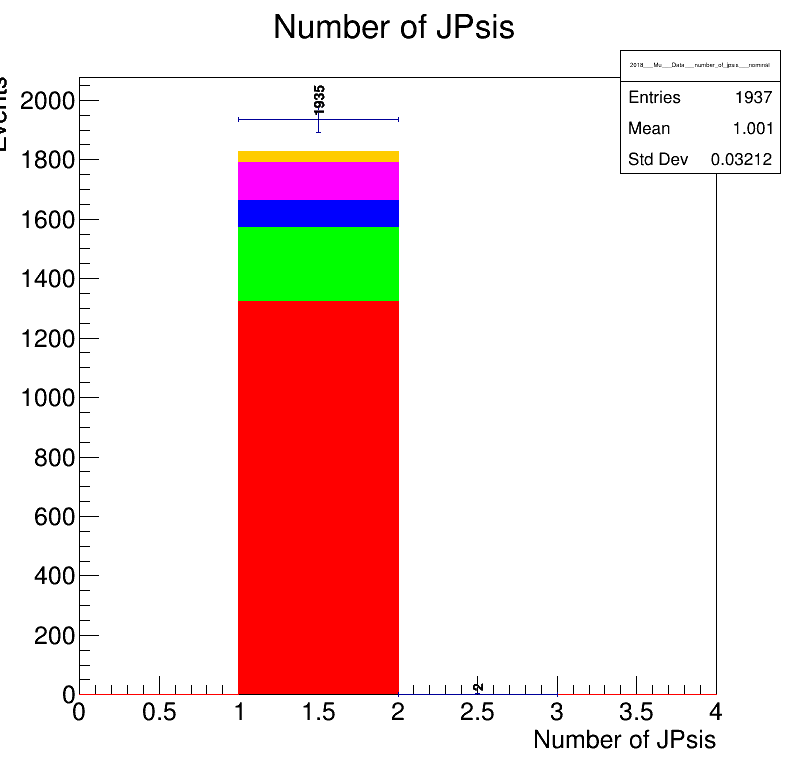

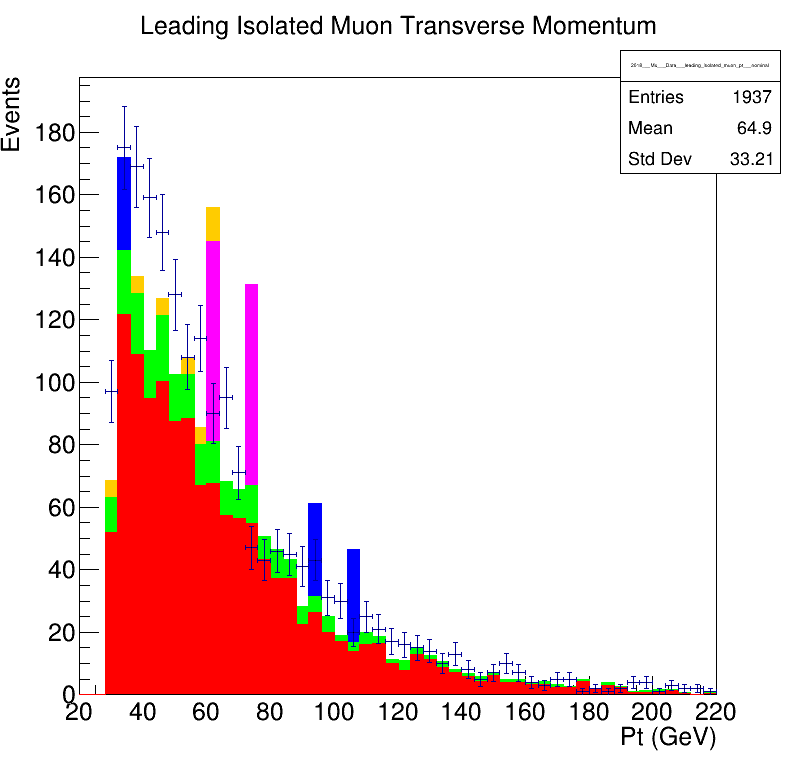

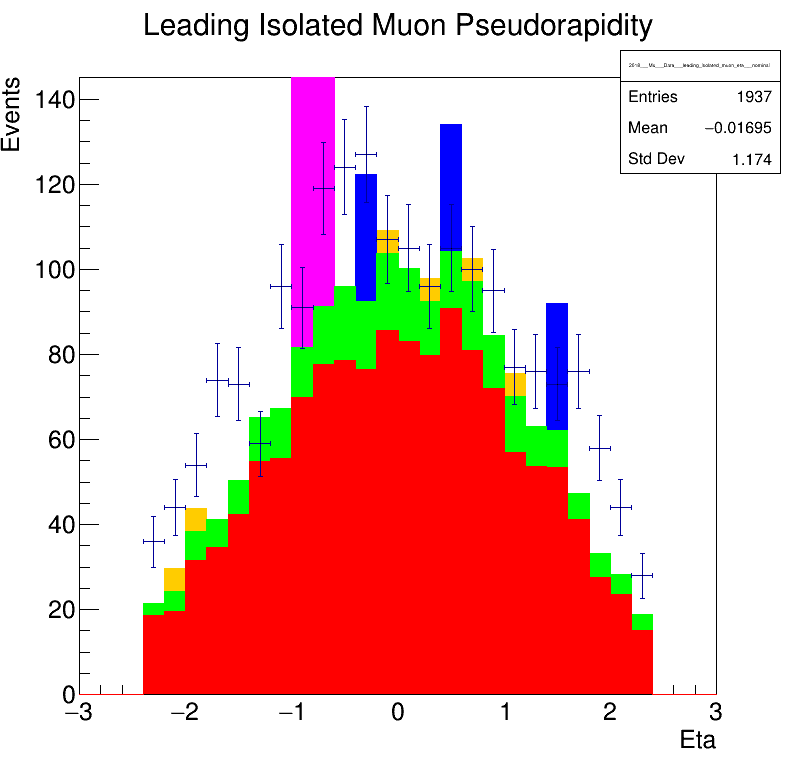

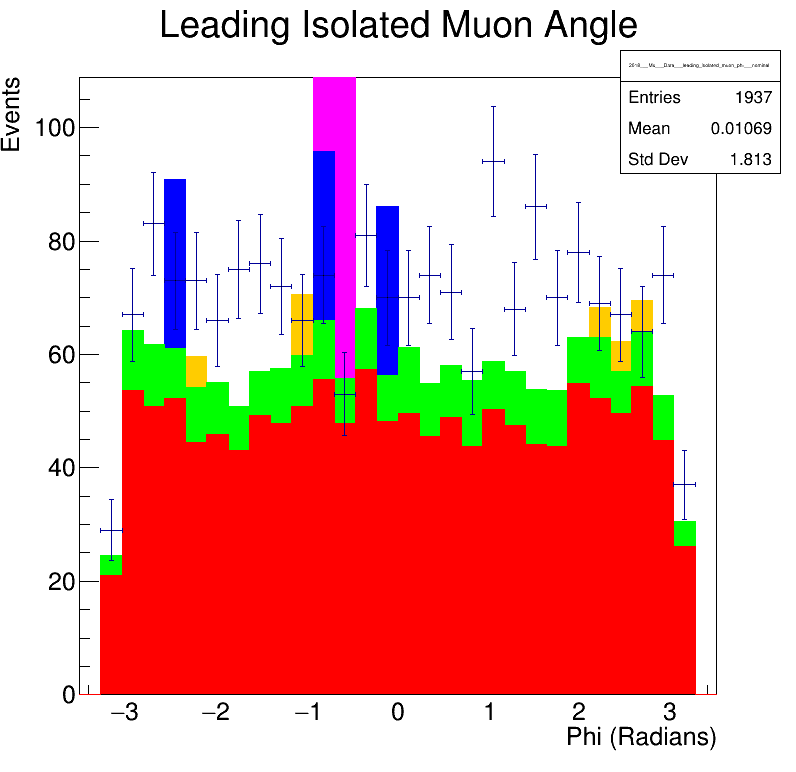

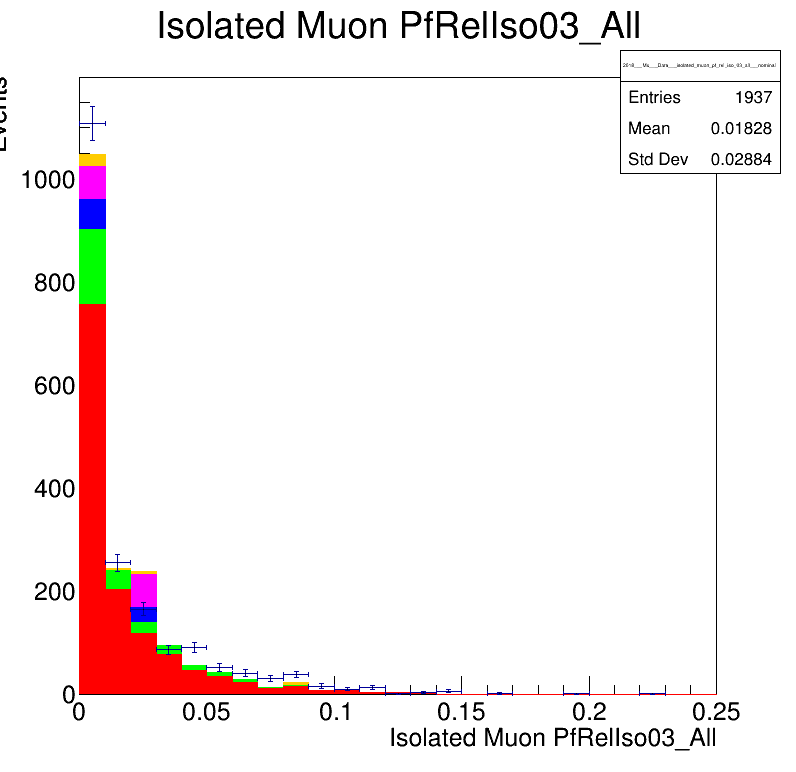

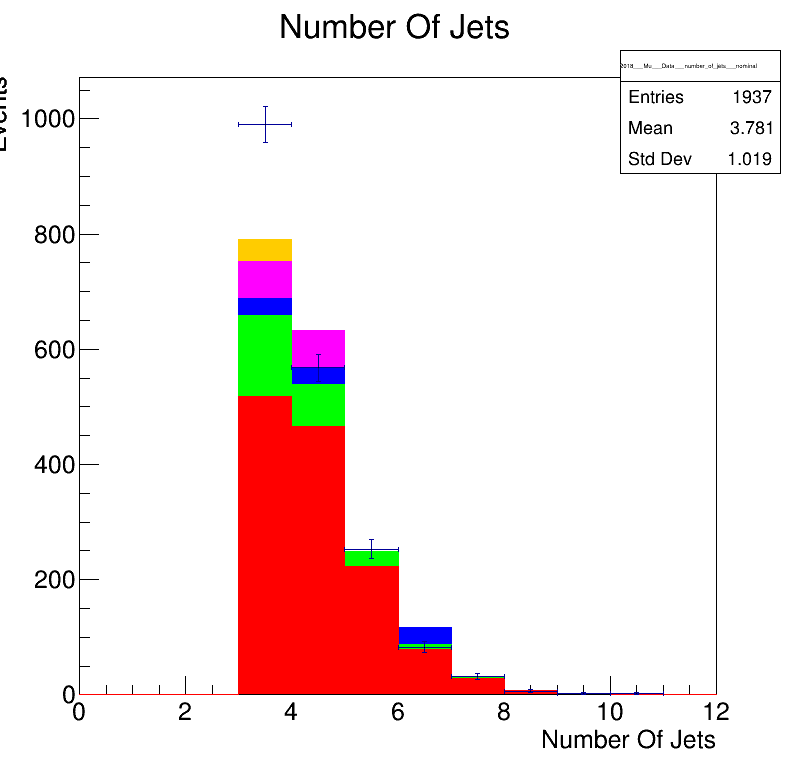

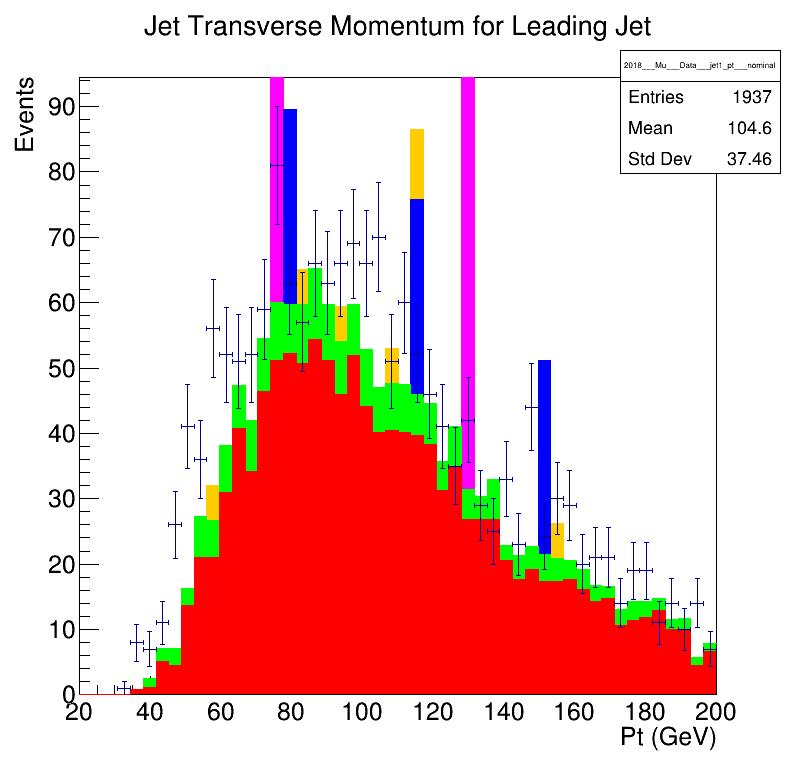

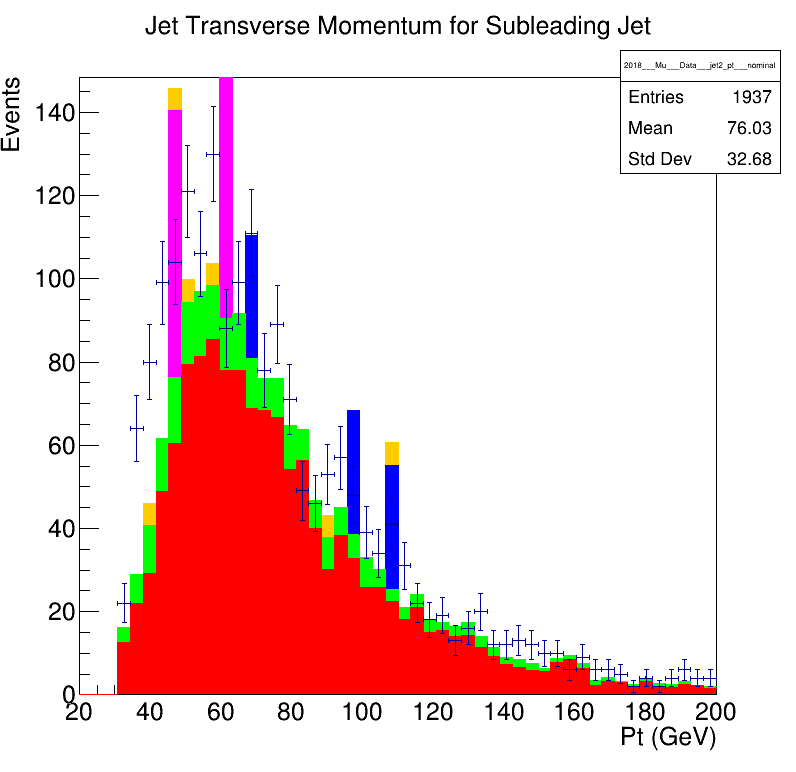

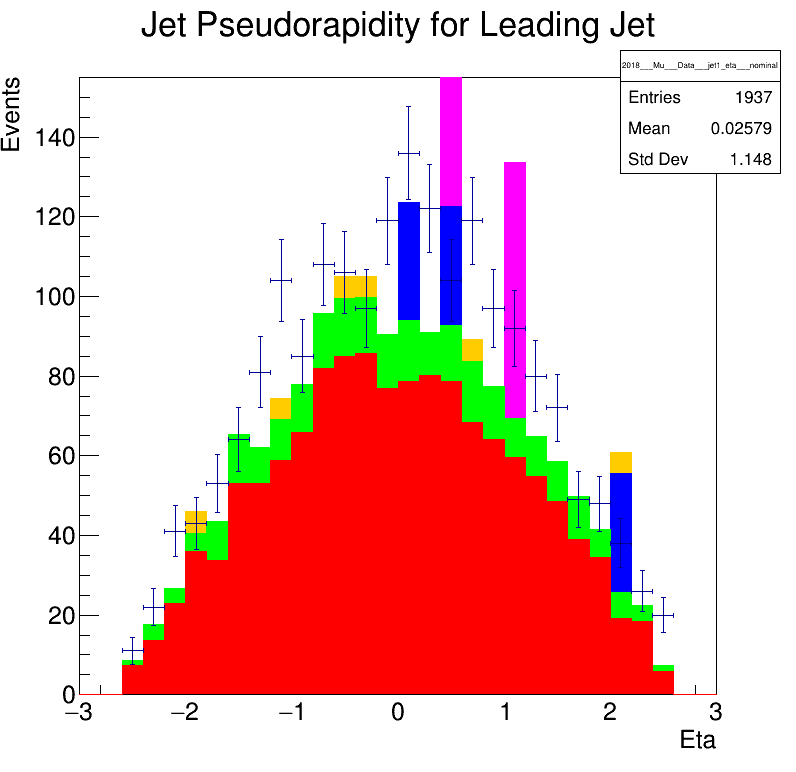

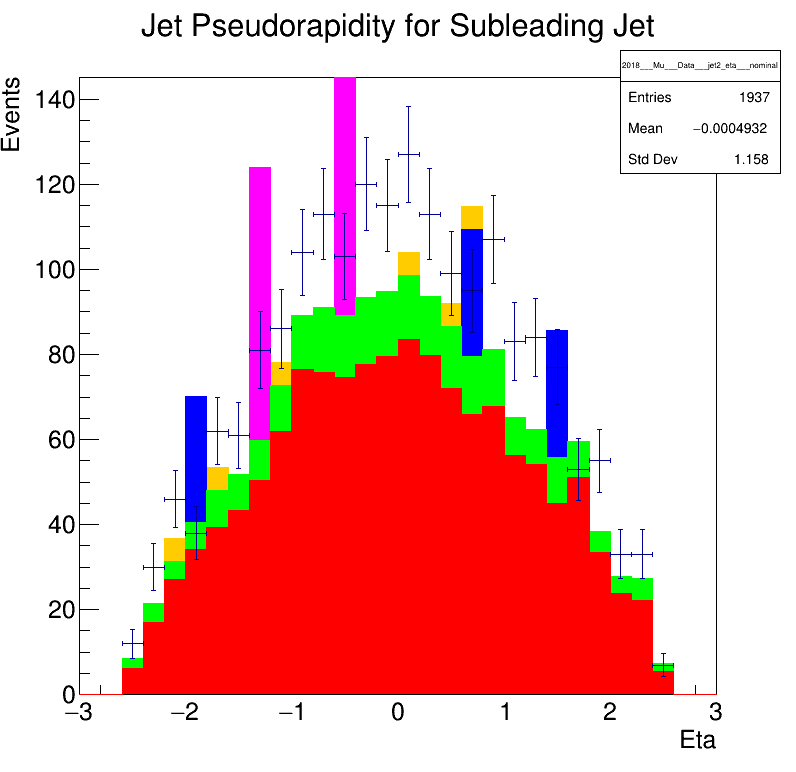

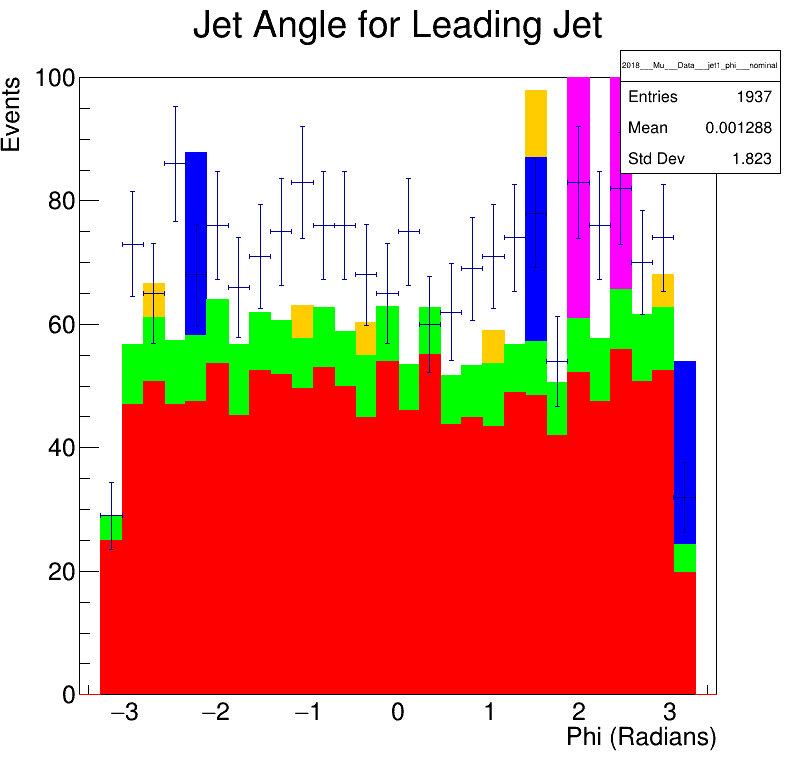

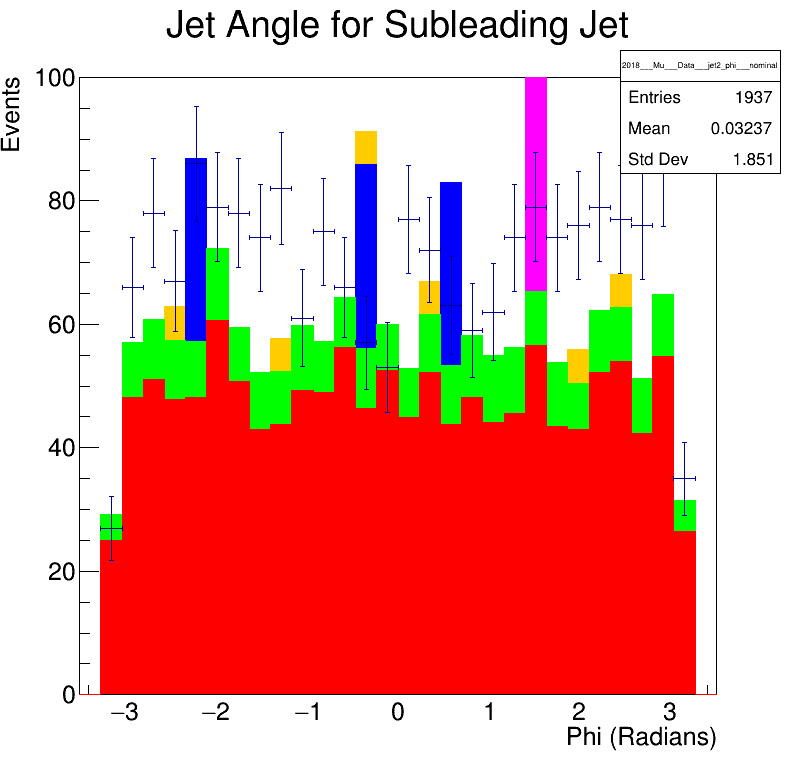

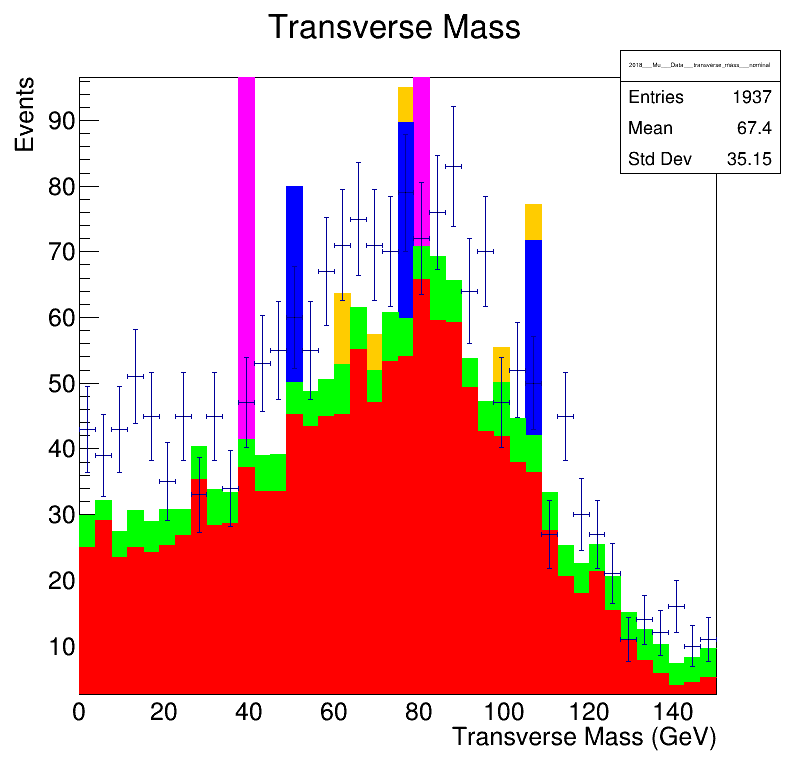

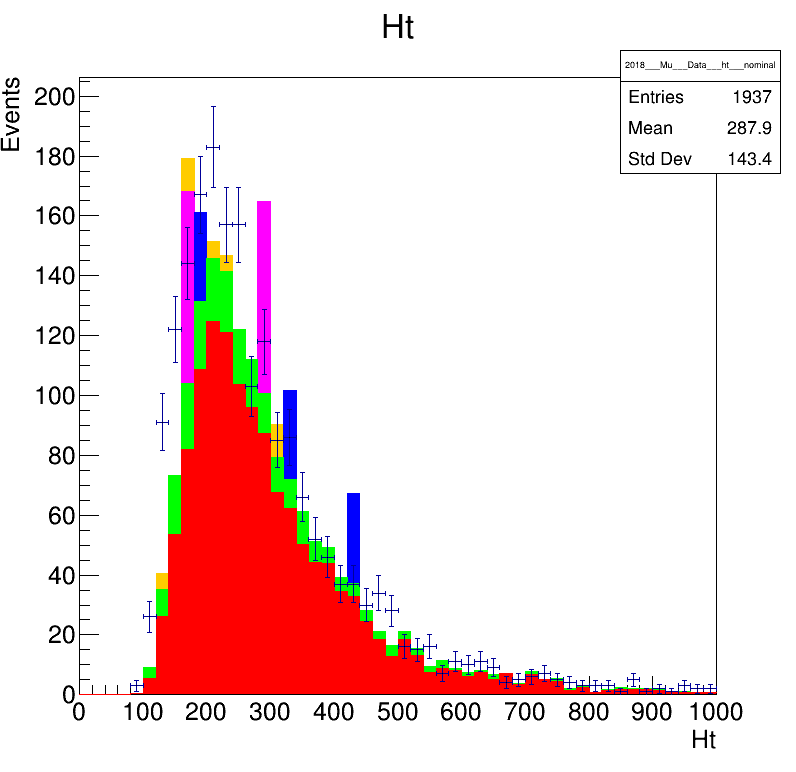

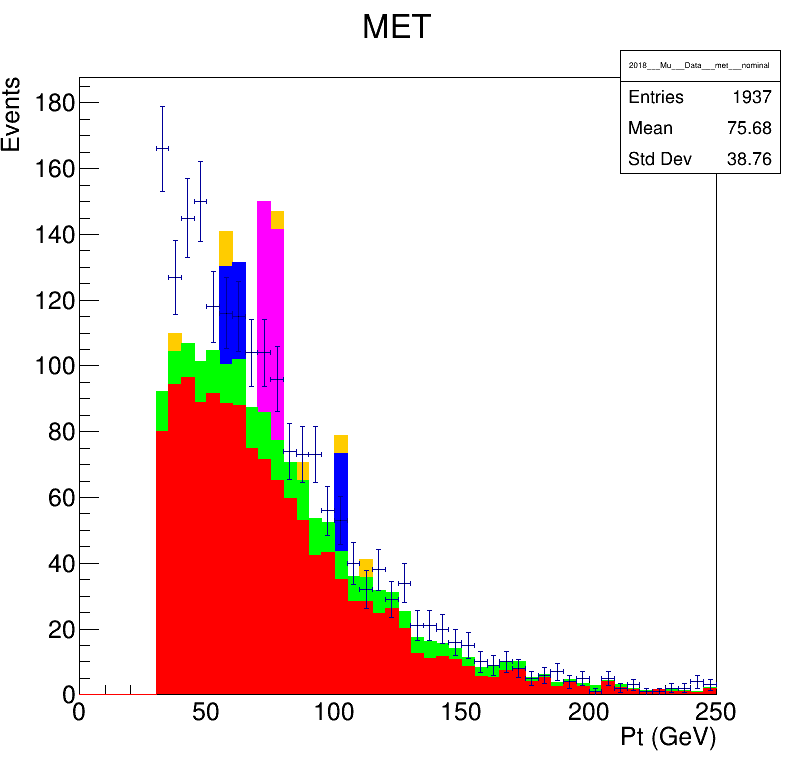

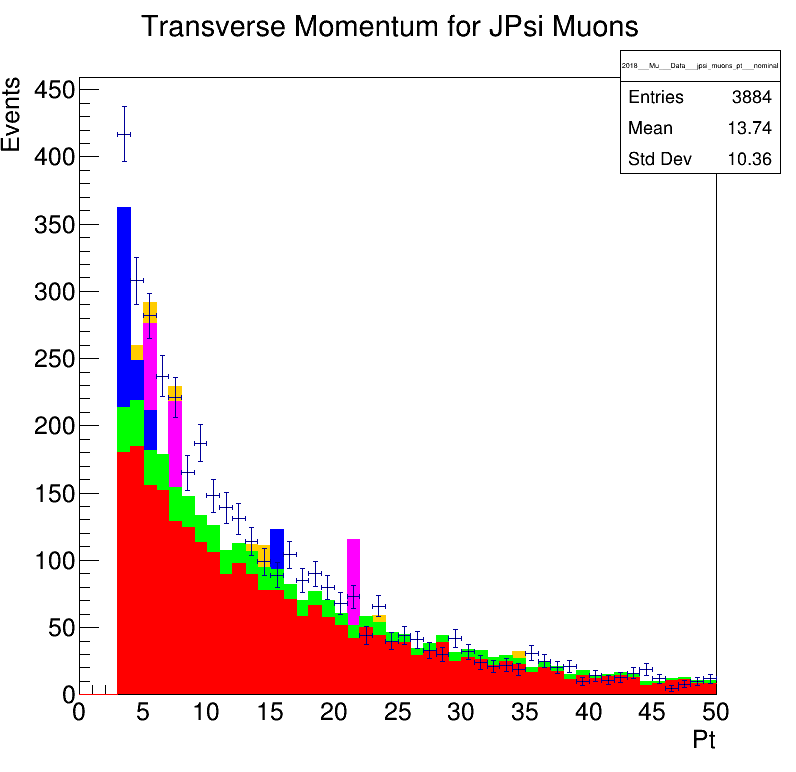

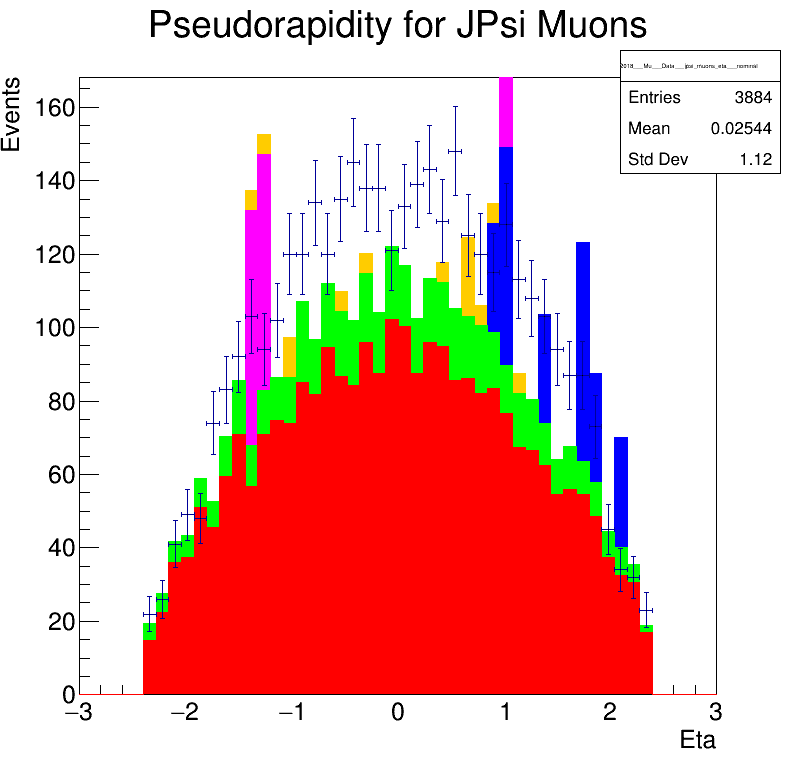

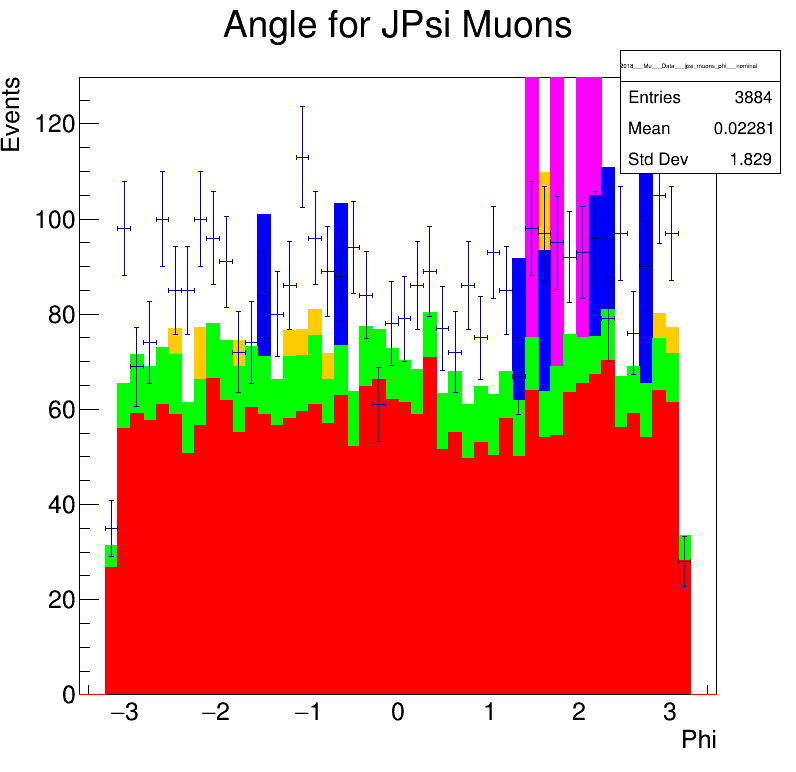

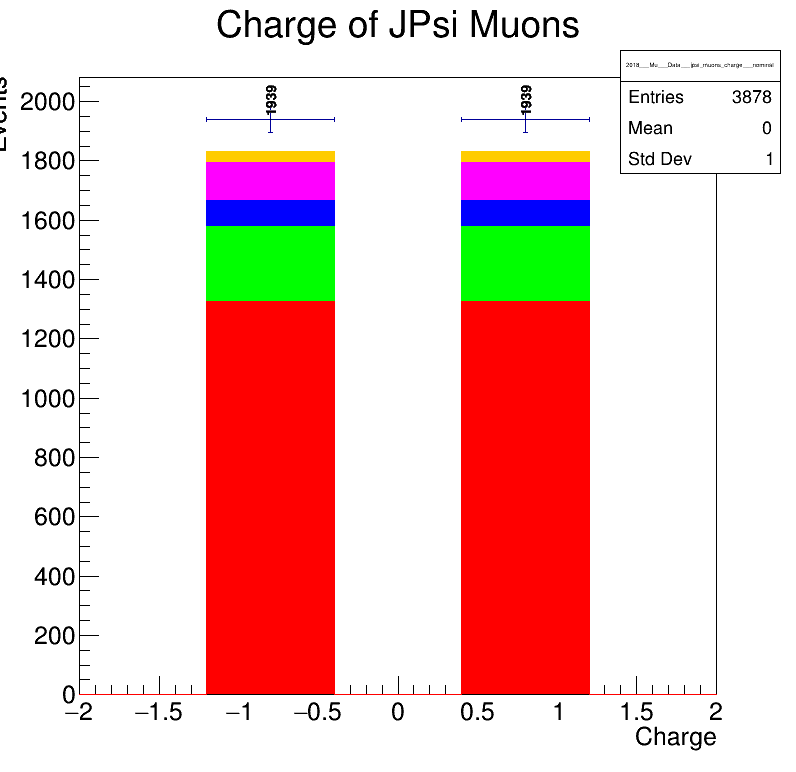

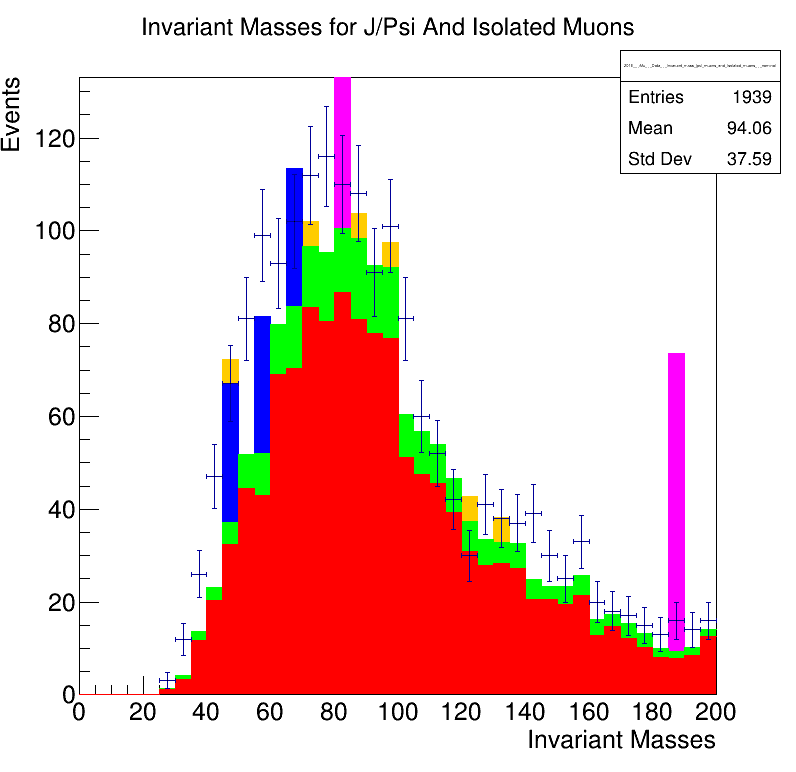

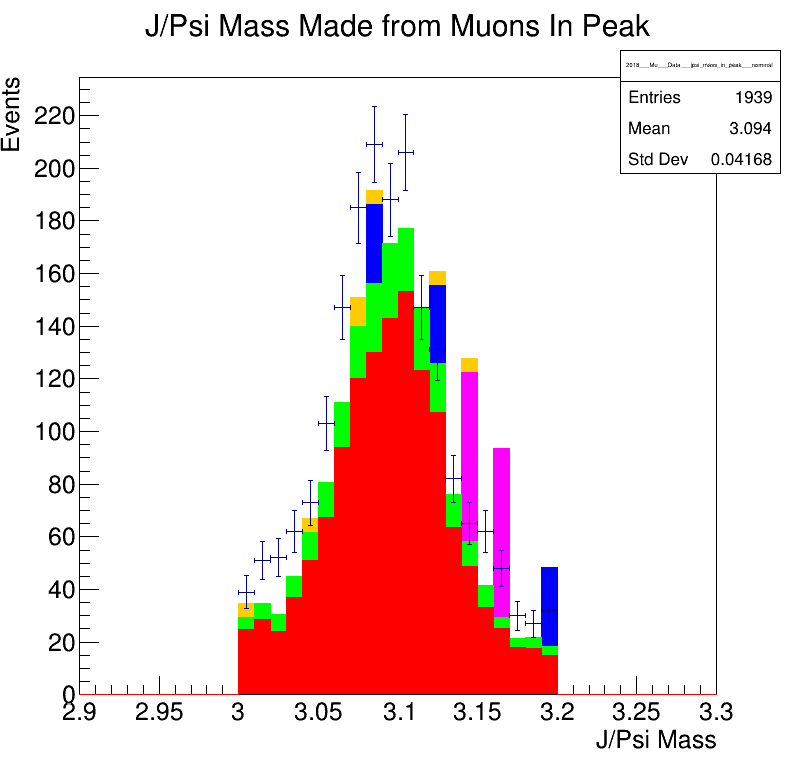

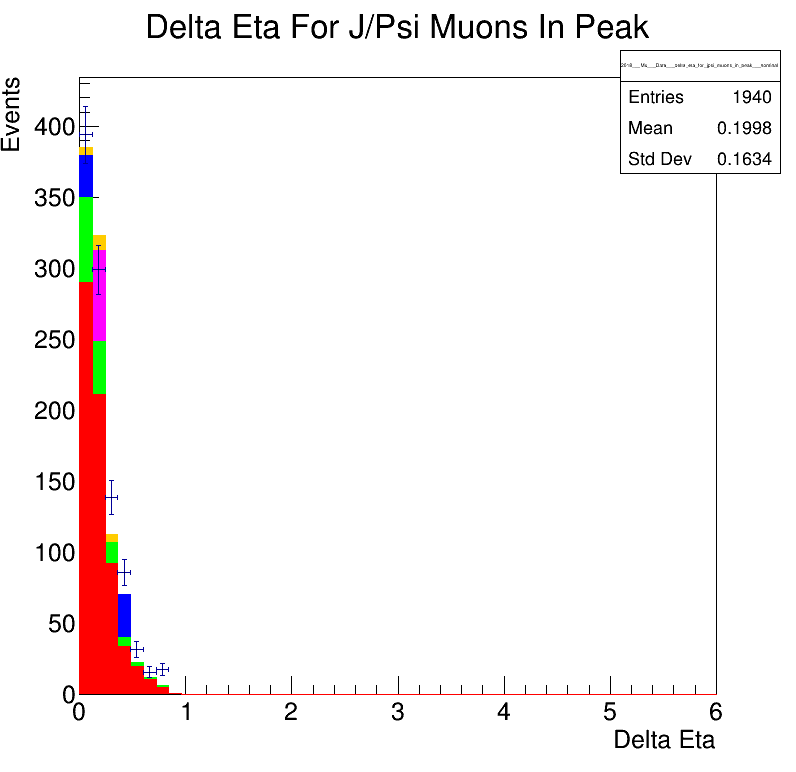

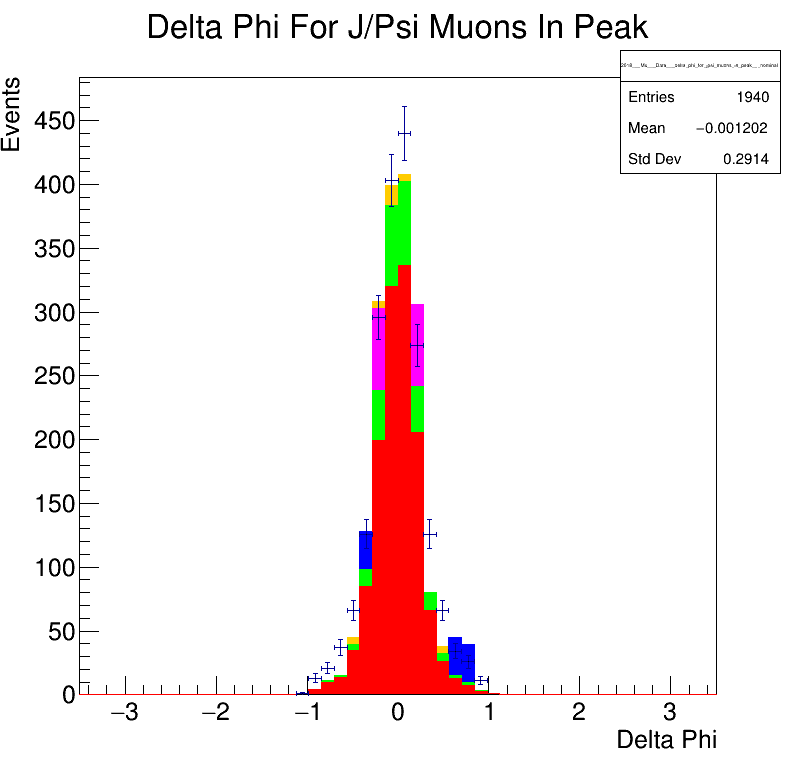

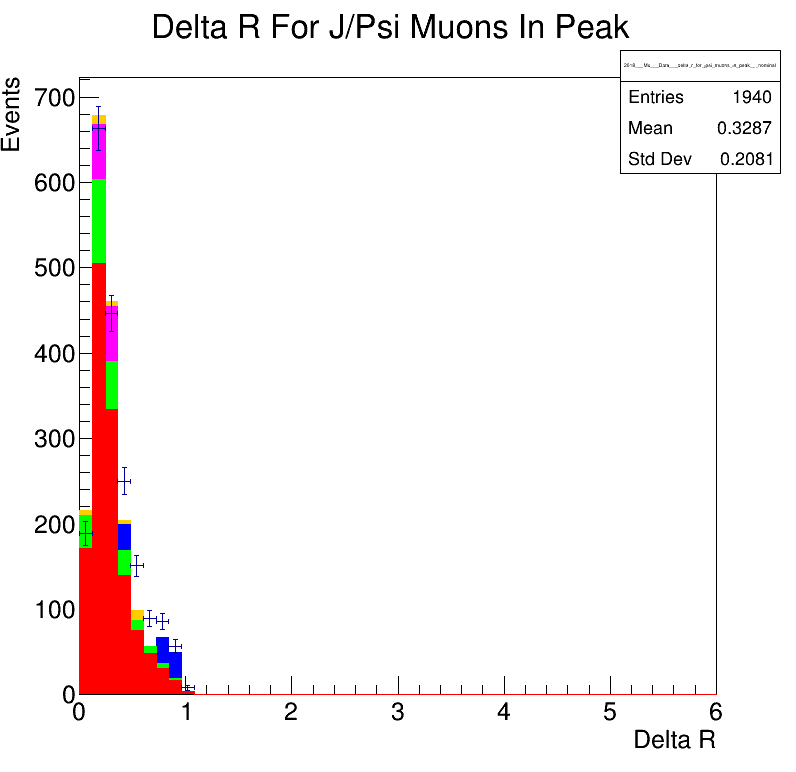

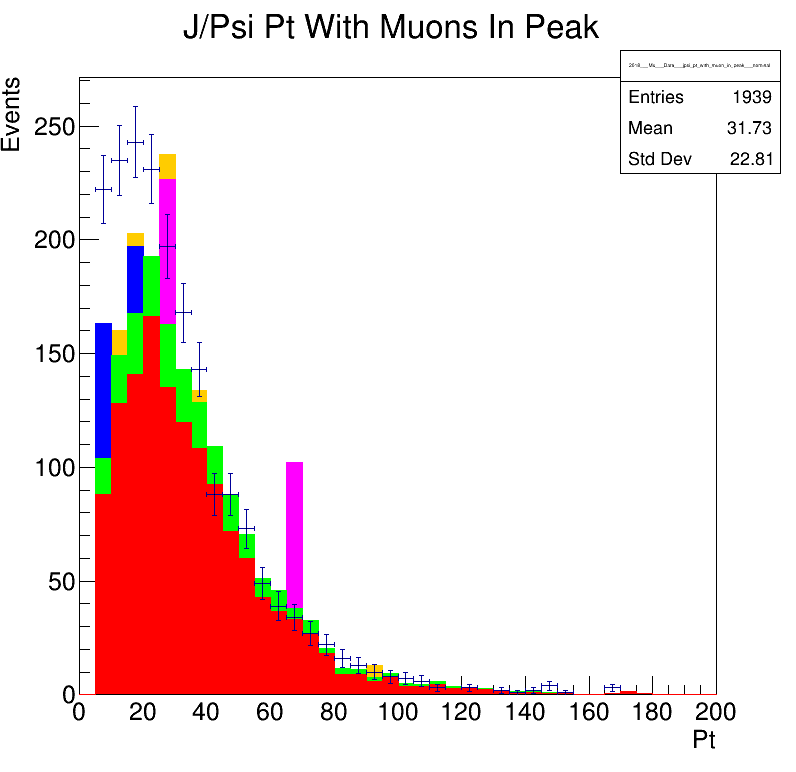

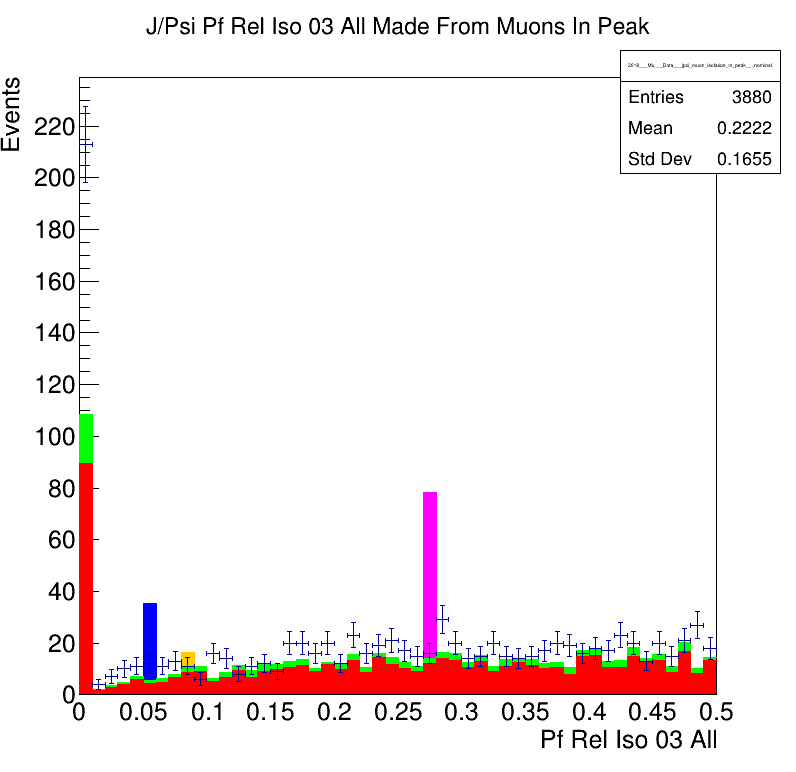

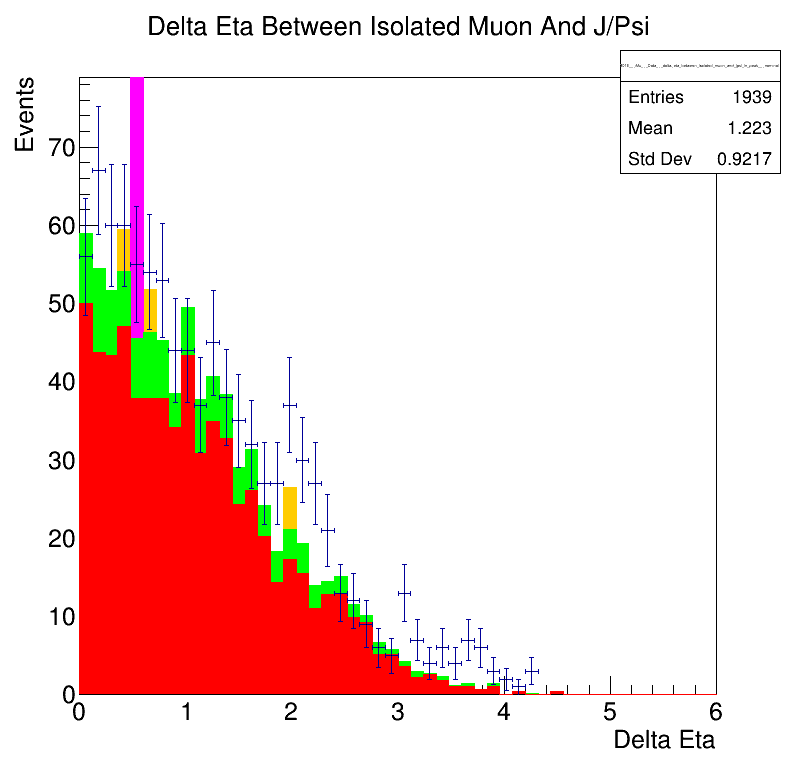

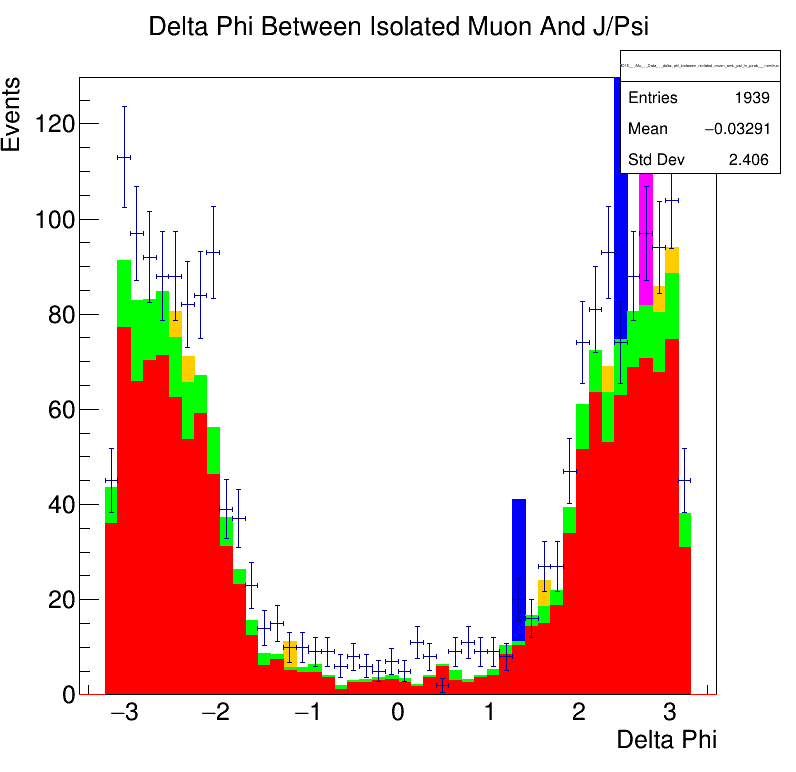

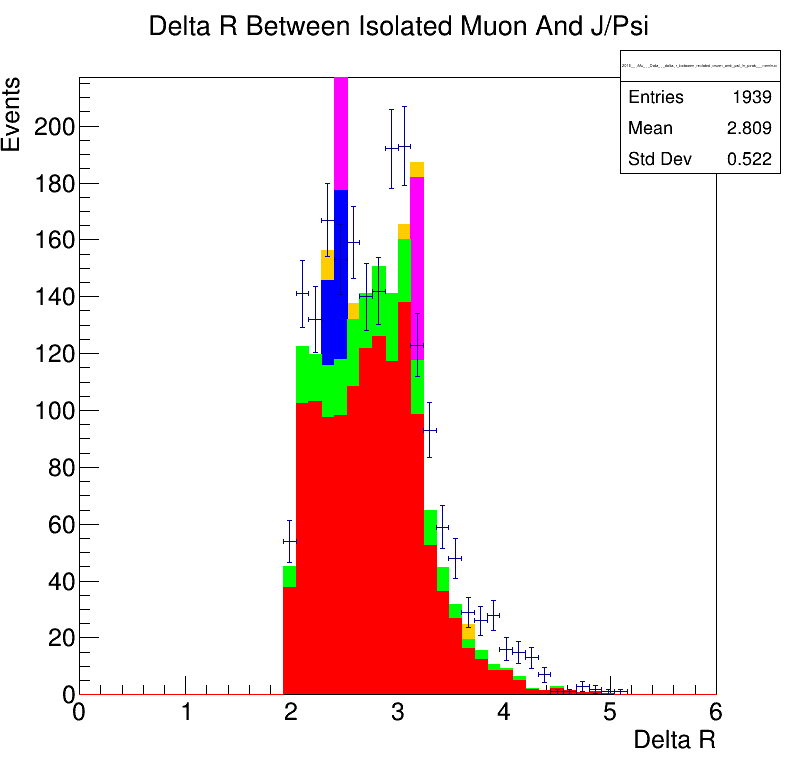

In [12]:
for item in MonteCarlo:

    for sample, color in {"TTToSemiLeptonic" : ROOT.kRed, "TTTo2L2Nu" : ROOT.kGreen, "WJetsToLNu" : ROOT.kBlue, "ST_tW_top" : ROOT.kMagenta, "ST_tchannel_top" : ROOT.kOrange}.items():
        print(item, sample, type(MonteCarlo[item][sample]))
        MonteCarlo[item][sample].SetFillColor(color)
        MonteCarlo[item][sample].SetLineColor(color)
        S[item].Add(MonteCarlo[item][sample])

canvasas = dict()

# canvas0 = ROOT.TCanvas("c_leading_isolated_muon_pt_initial", "", 800, 800)
# RealData["leading_isolated_muon_pt_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_pt_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_pt_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas0.Draw()
# canvasas['0'] = canvas0

# canvas1 = ROOT.TCanvas("c_leading_isolated_muon_eta_initial", "", 800, 800)
# RealData["leading_isolated_muon_eta_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_eta_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_eta_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas1.Draw()
# canvasas['1'] = canvas1

# canvas2 = ROOT.TCanvas("c_leading_isolated_muon_phi_initial", "", 800, 800)
# RealData["leading_isolated_muon_phi_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_phi_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_phi_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas2.Draw()
# canvasas['2'] = canvas2

# canvas3 = ROOT.TCanvas("c_leading_isolated_muon_mass_initial", "", 800, 800)
# RealData["leading_isolated_muon_mass_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_mass_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_mass_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas3.Draw()
# canvasas['3'] = canvas3

# canvas4 = ROOT.TCanvas("c_leading_isolated_muon_charge_initial", "", 800, 800)
# RealData["leading_isolated_muon_charge_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_charge_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_charge_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas4.Draw()
# canvasas['4'] = canvas4

# canvas5 = ROOT.TCanvas("c_leading_isolated_electron_pt_initial", "", 800, 800)
# RealData["leading_isolated_electron_pt_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_pt_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_pt_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas5.Draw()
# canvasas['5'] = canvas5

# canvas6 = ROOT.TCanvas("c_leading_isolated_electron_eta_initial", "", 800, 800)
# RealData["leading_isolated_electron_eta_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_eta_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_eta_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas6.Draw()
# canvasas['6'] = canvas6

# canvas7 = ROOT.TCanvas("c_leading_isolated_electron_phi_initial", "", 800, 800)
# RealData["leading_isolated_electron_phi_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_phi_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_phi_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas7.Draw()
# canvasas['7'] = canvas7

# canvas8 = ROOT.TCanvas("c_leading_isolated_electron_mass_initial", "", 800, 800)
# RealData["leading_isolated_electron_mass_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_mass_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_mass_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas8.Draw()
# canvasas['8'] = canvas8

# canvas9 = ROOT.TCanvas("c_leading_isolated_electron_charge_initial", "", 800, 800)
# RealData["leading_isolated_electron_charge_initial"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_charge_initial"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_charge_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas9.Draw()
# canvasas['9'] = canvas9

# canvas10 = ROOT.TCanvas("c_met_before_met_cut", "", 800, 800)
# RealData["met_before_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["met_before_met_cut"].Draw("HIST S SAME")
# RealData["met_before_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas10.Draw()
# canvasas['10'] = canvas10

# canvas11 = ROOT.TCanvas("c_met_after_met_cut", "", 800, 800)
# RealData["met_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["met_after_met_cut"].Draw("HIST S SAME")
# RealData["met_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas11.Draw()
# canvasas['11'] = canvas11

# canvas12 = ROOT.TCanvas("c_leading_isolated_muon_pt_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_pt_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas12.Draw()
# canvasas['12'] = canvas12

# canvas13 = ROOT.TCanvas("c_leading_isolated_muon_eta_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_eta_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas13.Draw()
# canvasas['13'] = canvas13

# canvas14 = ROOT.TCanvas("c_leading_isolated_muon_phi_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_phi_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas14.Draw()
# canvasas['14'] = canvas14

# canvas15 = ROOT.TCanvas("c_leading_isolated_muon_mass_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_mass_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas15.Draw()
# canvasas['15'] = canvas15

# canvas16 = ROOT.TCanvas("c_leading_isolated_muon_charge_after_met_cut", "", 800, 800)
# RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_charge_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas16.Draw()
# canvasas['16'] = canvas16

# canvas17 = ROOT.TCanvas("c_leading_isolated_electron_pt_after_met_cut", "", 800, 800)
# RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_pt_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_pt_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas17.Draw()
# canvasas['17'] = canvas17

# canvas18 = ROOT.TCanvas("c_leading_isolated_electron_eta_after_met_cut", "", 800, 800)
# RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_eta_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_eta_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas18.Draw()
# canvasas['18'] = canvas18

# canvas19 = ROOT.TCanvas("c_leading_isolated_electron_phi_after_met_cut", "", 800, 800)
# RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_phi_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_phi_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas19.Draw()
# canvasas['19'] = canvas19

# canvas20 = ROOT.TCanvas("c_leading_isolated_electron_mass_after_met_cut", "", 800, 800)
# RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_mass_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_mass_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas20.Draw()
# canvasas['20'] = canvas20

# canvas21 = ROOT.TCanvas("c_leading_isolated_electron_charge_after_met_cut", "", 800, 800)
# RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_electron_charge_after_met_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_electron_charge_after_met_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas21.Draw()
# canvasas['21'] = canvas21

# canvas22 = ROOT.TCanvas("c_number_of_jets_initial", "", 800, 800)
# RealData["number_of_jets_initial"]["SingleMuon2018"].Draw("PE1")
# S["number_of_jets_initial"].Draw("HIST S SAME")
# RealData["number_of_jets_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas22.Draw()
# canvasas['22'] = canvas22



# canvas24 = ROOT.TCanvas("c_leading_isolated_muon_pt_after_jet_cut", "", 800, 800)
# RealData["leading_isolated_muon_pt_after_jet_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_pt_after_jet_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_pt_after_jet_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas24.Draw()
# canvasas['24'] = canvas24

# canvas25 = ROOT.TCanvas("c_leading_isolated_muon_eta_after_jet_cut", "", 800, 800)
# RealData["leading_isolated_muon_eta_after_jet_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_eta_after_jet_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_eta_after_jet_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas25.Draw()
# canvasas['25'] = canvas25

# canvas26 = ROOT.TCanvas("c_leading_isolated_muon_phi_after_jet_cut", "", 800, 800)
# RealData["leading_isolated_muon_phi_after_jet_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_phi_after_jet_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_phi_after_jet_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas26.Draw()
# canvasas['26'] = canvas26

# canvas27 = ROOT.TCanvas("c_leading_isolated_muon_mass_after_jet_cut", "", 800, 800)
# RealData["leading_isolated_muon_mass_after_jet_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_mass_after_jet_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_mass_after_jet_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas27.Draw()
# canvasas['27'] = canvas27

# canvas28 = ROOT.TCanvas("c_leading_isolated_muon_charge_after_jet_cut", "", 800, 800)
# RealData["leading_isolated_muon_charge_after_jet_cut"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_charge_after_jet_cut"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_charge_after_jet_cut"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas28.Draw()
# canvasas['28'] = canvas28

# canvas29 = ROOT.TCanvas("c_number_of_jpsi_muons_initial", "", 800, 800)
# RealData["number_of_jpsi_muons_initial"]["SingleMuon2018"].Draw("PE1")
# S["number_of_jpsi_muons_initial"].Draw("HIST S SAME")
# RealData["number_of_jpsi_muons_initial"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas29.Draw()
# canvasas['29'] = canvas29

# canvas30 = ROOT.TCanvas("c_number_of_jpsi_muons", "", 800, 800)
# RealData["number_of_jpsi_muons"]["SingleMuon2018"].Draw("TEXT PE1")
# S["number_of_jpsi_muons"].Draw("HIST S SAME")
# RealData["number_of_jpsi_muons"]["SingleMuon2018"].Draw("TEXT PE1 SAME")
# canvas30.Draw()
# canvasas['30'] = canvas30

canvas30a = ROOT.TCanvas("c_number_of_jpsis", "", 800, 800)
RealData["number_of_jpsis"]["SingleMuon2018"].Draw("TEXT PE1")
S["number_of_jpsis"].Draw("HIST S SAME")
RealData["number_of_jpsis"]["SingleMuon2018"].Draw("TEXT PE1 SAME")
canvas30a.Draw()
canvasas['30a'] = canvas30a






















canvas31 = ROOT.TCanvas("c_leading_isolated_muon_pt", "", 800, 800)
RealData["leading_isolated_muon_pt"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_pt"].Draw("HIST S SAME")
RealData["leading_isolated_muon_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas31.Draw()
canvasas['31'] = canvas31

canvas32 = ROOT.TCanvas("c_leading_isolated_muon_eta", "", 800, 800)
RealData["leading_isolated_muon_eta"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_eta"].Draw("HIST S SAME")
RealData["leading_isolated_muon_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas32.Draw()
canvasas['32'] = canvas32

canvas33 = ROOT.TCanvas("c_leading_isolated_muon_phi", "", 800, 800)
RealData["leading_isolated_muon_phi"]["SingleMuon2018"].Draw("PE1")
S["leading_isolated_muon_phi"].Draw("HIST S SAME")
RealData["leading_isolated_muon_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas33.Draw()
canvasas['33'] = canvas33

canvas33a = ROOT.TCanvas("c_isolated_muon_pf_rel_iso_03_all", "", 800, 800)
RealData["isolated_muon_pf_rel_iso_03_all"]["SingleMuon2018"].Draw("PE1")
S["isolated_muon_pf_rel_iso_03_all"].Draw("HIST S SAME")
RealData["isolated_muon_pf_rel_iso_03_all"]["SingleMuon2018"].Draw("PE1 SAME")
canvas33a.Draw()
canvasas['33a'] = canvas33a

canvas34a = ROOT.TCanvas("c_number_of_jets", "", 800, 800)
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1")
S["number_of_jets"].Draw("HIST S SAME")
RealData["number_of_jets"]["SingleMuon2018"].Draw("PE1 SAME")
canvas34a.Draw()
canvasas['34a'] = canvas34a

canvas35 = ROOT.TCanvas("c_jet1_pt", "", 800, 800)
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1")
S["jet1_pt"].Draw("HIST S SAME")
RealData["jet1_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas35.Draw()
canvasas['35'] = canvas35

canvas36 = ROOT.TCanvas("c_jet2_pt", "", 800, 800)
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1")
S["jet2_pt"].Draw("HIST S SAME")
RealData["jet2_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas36.Draw()
canvasas['36'] = canvas36

canvas37 = ROOT.TCanvas("c_jet1_eta", "", 800, 800)
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1")
S["jet1_eta"].Draw("HIST S SAME")
RealData["jet1_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas37.Draw()
canvasas['37'] = canvas37

canvas38 = ROOT.TCanvas("c_jet2_eta", "", 800, 800)
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1")
S["jet2_eta"].Draw("HIST S SAME")
RealData["jet2_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas38.Draw()
canvasas['38'] = canvas38

canvas39 = ROOT.TCanvas("c_jet1_phi", "", 800, 800)
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1")
S["jet1_phi"].Draw("HIST S SAME")
RealData["jet1_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas39.Draw()
canvasas['39'] = canvas39

canvas40 = ROOT.TCanvas("c_jet2_phi", "", 800, 800)
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1")
S["jet2_phi"].Draw("HIST S SAME")
RealData["jet2_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas40.Draw()
canvasas['40'] = canvas40

canvas41 = ROOT.TCanvas("c_transverse_mass", "", 800, 800)
RealData["transverse_mass"]["SingleMuon2018"].Draw("PE1")
S["transverse_mass"].Draw("HIST S SAME")
RealData["transverse_mass"]["SingleMuon2018"].Draw("PE1 SAME")
canvas41.Draw()
canvasas['41'] = canvas41

canvas42 = ROOT.TCanvas("c_ht", "", 800, 800)
RealData["ht"]["SingleMuon2018"].Draw("PE1")
S["ht"].Draw("HIST S SAME")
RealData["ht"]["SingleMuon2018"].Draw("PE1 SAME")
canvas42.Draw()
canvasas['42'] = canvas42

canvas42a = ROOT.TCanvas("c_met", "", 800, 800)
RealData["met"]["SingleMuon2018"].Draw("PE1")
S["met"].Draw("HIST S SAME")
RealData["met"]["SingleMuon2018"].Draw("PE1 SAME")
# ROOT.TRatioPlot(RealData["met"]["SingleMuon2018"],MonteCarlo["met_after_met_cut"]["TTToSemiLeptonic"]).Draw("PE1")
canvas42a.Draw()
canvasas['42a'] = canvas42a

canvas43 = ROOT.TCanvas("c_jpsi_muons_pt", "", 800, 800)
RealData["jpsi_muons_pt"]["SingleMuon2018"].Draw("PE1")
S["jpsi_muons_pt"].Draw("HIST S SAME")
RealData["jpsi_muons_pt"]["SingleMuon2018"].Draw("PE1 SAME")
canvas43.Draw()
canvasas['43'] = canvas43

canvas44 = ROOT.TCanvas("c_jpsi_muons_eta", "", 800, 800)
RealData["jpsi_muons_eta"]["SingleMuon2018"].Draw("PE1")
S["jpsi_muons_eta"].Draw("HIST S SAME")
RealData["jpsi_muons_eta"]["SingleMuon2018"].Draw("PE1 SAME")
canvas44.Draw()
canvasas['44'] = canvas44

canvas45 = ROOT.TCanvas("c_jpsi_muons_phi", "", 800, 800)
RealData["jpsi_muons_phi"]["SingleMuon2018"].Draw("PE1")
S["jpsi_muons_phi"].Draw("HIST S SAME")
RealData["jpsi_muons_phi"]["SingleMuon2018"].Draw("PE1 SAME")
canvas45.Draw()
canvasas['45'] = canvas45

canvas46 = ROOT.TCanvas("c_jpsi_muons_charge", "", 800, 800)
RealData["jpsi_muons_charge"]["SingleMuon2018"].Draw("TEXT PE1")
S["jpsi_muons_charge"].Draw("HIST S SAME")
RealData["jpsi_muons_charge"]["SingleMuon2018"].Draw("TEXT PE1 SAME")
canvas46.Draw()
canvasas['46'] = canvas46

# canvas61b = ROOT.TCanvas("c_jpsi_muon_pf_rel_iso_03_all", "", 800, 800)
# RealData["jpsi_muon_pf_rel_iso_03_all"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_muon_pf_rel_iso_03_all"].Draw("HIST S SAME")
# RealData["jpsi_muon_pf_rel_iso_03_all"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61b.Draw()
# canvasas['61b'] = canvas61b




















# canvas33a = ROOT.TCanvas("c_leading_isolated_muon_mass", "", 800, 800)
# RealData["leading_isolated_muon_mass"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_mass"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_mass"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas33a.Draw()
# canvasas['33a'] = canvas33a

# canvas34 = ROOT.TCanvas("c_leading_isolated_muon_charge", "", 800, 800)
# RealData["leading_isolated_muon_charge"]["SingleMuon2018"].Draw("PE1")
# S["leading_isolated_muon_charge"].Draw("HIST S SAME")
# RealData["leading_isolated_muon_charge"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas34.Draw()
# canvasas['34'] = canvas34



















































# canvas47 = ROOT.TCanvas("c_invariant_mass_jpsi_muons", "", 800, 800)
# RealData["invariant_mass_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["invariant_mass_jpsi_muons"].Draw("HIST S SAME")
# RealData["invariant_mass_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas47.Draw()
# canvasas['47'] = canvas47

# canvas48 = ROOT.TCanvas("c_invariant_masses_zoomed", "", 800, 800)
# RealData["invariant_masses_zoomed"]["SingleMuon2018"].Draw("PE1")
# S["invariant_masses_zoomed"].Draw("HIST S SAME")
# RealData["invariant_masses_zoomed"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas48.Draw()
# canvasas['48'] = canvas48

canvas49 = ROOT.TCanvas("c_invariant_mass_jpsi_muons_and_isolated_muons", "", 800, 800)
RealData["invariant_mass_jpsi_muons_and_isolated_muons"]["SingleMuon2018"].Draw("PE1")
S["invariant_mass_jpsi_muons_and_isolated_muons"].Draw("HIST S SAME")
RealData["invariant_mass_jpsi_muons_and_isolated_muons"]["SingleMuon2018"].Draw("PE1 SAME")
canvas49.Draw()
canvasas['49'] = canvas49

# canvas50 = ROOT.TCanvas("c_delta_eta_between_isolated_and_jpsi_muons", "", 800, 800)
# RealData["delta_eta_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_eta_between_isolated_and_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_eta_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas50.Draw()
# canvasas['50'] = canvas50

# canvas51 = ROOT.TCanvas("c_delta_phi_between_isolated_and_jpsi_muons", "", 800, 800)
# RealData["delta_phi_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_phi_between_isolated_and_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_phi_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas51.Draw()
# canvasas['51'] = canvas51

# canvas52 = ROOT.TCanvas("c_delta_r_between_isolated_and_jpsi_muons", "", 800, 800)
# RealData["delta_r_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_r_between_isolated_and_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_r_between_isolated_and_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas52.Draw()
# canvasas['52'] = canvas52

# canvas53 = ROOT.TCanvas("c_jpsi_pt", "", 800, 800)
# RealData["jpsi_pt"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_pt"].Draw("HIST S SAME")
# RealData["jpsi_pt"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas53.Draw()
# canvasas['53'] = canvas53

# canvas54 = ROOT.TCanvas("c_jpsi_eta", "", 800, 800)
# RealData["jpsi_eta"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_eta"].Draw("HIST S SAME")
# RealData["jpsi_eta"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas54.Draw()
# canvasas['54'] = canvas54

# canvas55 = ROOT.TCanvas("c_jpsi_phi", "", 800, 800)
# RealData["jpsi_phi"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_phi"].Draw("HIST S SAME")
# RealData["jpsi_phi"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas55.Draw()
# canvasas['55'] = canvas55

# canvas56 = ROOT.TCanvas("c_delta_eta_between_jpsi_muons", "", 800, 800)
# RealData["delta_eta_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_eta_between_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_eta_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas56.Draw()
# canvasas['56'] = canvas56

# canvas57 = ROOT.TCanvas("c_delta_phi_between_jpsi_muons", "", 800, 800)
# RealData["delta_phi_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_phi_between_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_phi_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas57.Draw()
# canvasas['57'] = canvas57

# canvas58 = ROOT.TCanvas("c_delta_r_between_jpsi_muons", "", 800, 800)
# RealData["delta_r_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1")
# S["delta_r_between_jpsi_muons"].Draw("HIST S SAME")
# RealData["delta_r_between_jpsi_muons"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas58.Draw()
# canvasas['58'] = canvas58


# canvas58a = ROOT.TCanvas("c_delta_r_between_jpsi_muons_in_peak", "", 800, 800)
# RealData["delta_r_between_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1")
# S["delta_r_between_jpsi_muons_in_peak"].Draw("HIST S SAME")
# RealData["delta_r_between_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas58a.Draw()
# canvasas['58a'] = canvas58a


# canvas59 = ROOT.TCanvas("c_delta_eta_between_isolated_muon_and_jpsi", "", 800, 800)
# RealData["delta_eta_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1")
# S["delta_eta_between_isolated_muon_and_jpsi"].Draw("HIST S SAME")
# RealData["delta_eta_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas59.Draw()
# canvasas['59'] = canvas59

# canvas60 = ROOT.TCanvas("c_delta_phi_between_isolated_muon_and_jpsi", "", 800, 800)
# RealData["delta_phi_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1")
# S["delta_phi_between_isolated_muon_and_jpsi"].Draw("HIST S SAME")
# RealData["delta_phi_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas60.Draw()
# canvasas['60'] = canvas60

# canvas61 = ROOT.TCanvas("c_delta_r_between_isolated_muon_and_jpsi", "", 800, 800)
# RealData["delta_r_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1")
# S["delta_r_between_isolated_muon_and_jpsi"].Draw("HIST S SAME")
# RealData["delta_r_between_isolated_muon_and_jpsi"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61.Draw()
# canvasas['61'] = canvas61







# canvas61a = ROOT.TCanvas("c_jpsi_muon_pt", "", 800, 800)
# RealData["jpsi_muon_pt"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_muon_pt"].Draw("HIST S SAME")
# RealData["jpsi_muon_pt"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61a.Draw()
# canvasas['61a'] = canvas61a



# canvas61c = ROOT.TCanvas("c_jpsi_muon_pf_iso_id", "", 800, 800)
# RealData["jpsi_muon_pf_iso_id"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_muon_pf_iso_id"].Draw("HIST S SAME")
# RealData["jpsi_muon_pf_iso_id"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61c.Draw()
# canvasas['61c'] = canvas61c

# canvas61d = ROOT.TCanvas("c_isolated_muons_in_range_pfRelIso03_all", "", 800, 800)
# RealData["isolated_muons_in_range_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1")
# S["isolated_muons_in_range_pfRelIso03_all"].Draw("HIST S SAME")
# RealData["isolated_muons_in_range_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61d.Draw()
# canvasas['61d'] = canvas61d

# canvas61e = ROOT.TCanvas("c_jpsi_muons_in_range_pfRelIso03_all", "", 800, 800)
# RealData["jpsi_muons_in_range_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_muons_in_range_pfRelIso03_all"].Draw("HIST S SAME")
# RealData["jpsi_muons_in_range_pfRelIso03_all"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61e.Draw()
# canvasas['61e'] = canvas61e

# canvas61f = ROOT.TCanvas("c_jpsi_mass_muons_in_range", "", 800, 800)
# #RealData["jpsi_mass_muons_in_range"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_mass_muons_in_range"].Draw("HIST S")
# RealData["jpsi_mass_muons_in_range"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas61f.Draw()
# canvasas['61f'] = canvas61f

# canvas61g = ROOT.TCanvas("c_pt_at_low_delta_r", "", 800, 800)
# RealData["pt_at_low_delta_r"]["SingleMuon2018"].Draw("P")
# canvas61g.Draw()
# canvasas['61g'] = canvas61g











canvas96 = ROOT.TCanvas("c_jpsi_mass_in_peak", "", 800, 800)
RealData["jpsi_mass_in_peak"]["SingleMuon2018"].Draw("PE1")
S["jpsi_mass_in_peak"].Draw("HIST S SAME")
RealData["jpsi_mass_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas96.Draw()
canvasas['96'] = canvas96

canvas97 = ROOT.TCanvas("c_delta_eta_for_jpsi_muons_in_peak", "", 800, 800)
RealData["delta_eta_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_eta_for_jpsi_muons_in_peak"].Draw("HIST S SAME")
RealData["delta_eta_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas97.Draw()
canvasas['97'] = canvas97

canvas98 = ROOT.TCanvas("c_delta_phi_for_jpsi_muons_in_peak", "", 800, 800)
RealData["delta_phi_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_phi_for_jpsi_muons_in_peak"].Draw("HIST S SAME")
RealData["delta_phi_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas98.Draw()
canvasas['98'] = canvas98

canvas99 = ROOT.TCanvas("c_delta_r_for_jpsi_muons_in_peak", "", 800, 800)
RealData["delta_r_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_r_for_jpsi_muons_in_peak"].Draw("HIST S SAME")
RealData["delta_r_for_jpsi_muons_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas99.Draw()
canvasas['99'] = canvas99

# canvas100 = ROOT.TCanvas("c_jpsi_muons_charge_in_peak", "", 800, 800)
# RealData["jpsi_muons_charge_in_peak"]["SingleMuon2018"].Draw("PE1")
# S["jpsi_muons_charge_in_peak"].Draw("HIST S SAME")
# RealData["jpsi_muons_charge_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
# canvas100.Draw()
# canvasas['100'] = canvas100

canvas101 = ROOT.TCanvas("c_jpsi_pt_with_muon_in_peak", "", 800, 800)
RealData["jpsi_pt_with_muon_in_peak"]["SingleMuon2018"].Draw("PE1")
S["jpsi_pt_with_muon_in_peak"].Draw("HIST S SAME")
RealData["jpsi_pt_with_muon_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas101.Draw()
canvasas['101'] = canvas101

# canvas101a = ROOT.TCanvas("c_jpsi_muon_pts_in_peak", "", 800, 800)
# RealData["jpsi_muon_pts_in_peak"]["SingleMuon2018"].Draw("P")
# canvas101a.Draw()
# canvasas['101a'] = canvas101a

canvas102 = ROOT.TCanvas("c_jpsi_muon_isolation_in_peak", "", 800, 800)
RealData["jpsi_muon_isolation_in_peak"]["SingleMuon2018"].Draw("PE1")
S["jpsi_muon_isolation_in_peak"].Draw("HIST S SAME")
RealData["jpsi_muon_isolation_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas102.Draw()
canvasas['102'] = canvas102

canvas104 = ROOT.TCanvas("c_delta_eta_between_isolated_muon_and_jpsi_in_peak", "", 800, 800)
RealData["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_eta_between_isolated_muon_and_jpsi_in_peak"].Draw("HIST S SAME")
RealData["delta_eta_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas104.Draw()
canvasas['104'] = canvas104

canvas105 = ROOT.TCanvas("c_delta_phi_between_isolated_muon_and_jpsi_in_peak", "", 800, 800)
RealData["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_phi_between_isolated_muon_and_jpsi_in_peak"].Draw("HIST S SAME")
RealData["delta_phi_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas105.Draw()
canvasas['105'] = canvas105

canvas106 = ROOT.TCanvas("c_delta_r_between_isolated_muon_and_jpsi_in_peak", "", 800, 800)
RealData["delta_r_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1")
S["delta_r_between_isolated_muon_and_jpsi_in_peak"].Draw("HIST S SAME")
RealData["delta_r_between_isolated_muon_and_jpsi_in_peak"]["SingleMuon2018"].Draw("PE1 SAME")
canvas106.Draw()
canvasas['106'] = canvas106

In [13]:
for kn, k in enumerate(canvasas.keys()):
    
    if kn == 0:
        print("Opening PDF")
        canvasas[k].SaveAs('8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf(')
    
    elif kn == len(canvasas) - 1:
        print("Closing PDF")
        canvasas[k].SaveAs('8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf)')
    
    else:
        canvasas[k].SaveAs('8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf')

Opening PDF
Closing PDF


Info in <TCanvas::Print>: pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf has been created using the current canvas
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file 8_20_22_3Gev_dR_gt_2_3bim_gt_20_3plus_jets.pdf
Info in <TCanvas::Print>: Cu

In [ ]:
era = "2017"
channel = "Mu"

def DrawStack(MonteCarlo, Data, separator = "___"):
    era, channel, sample, variable, systematic = list(MonteCarlo.values())[0].GetName().split(separator)
    name = "_".join(["stack", era, channel, variable, systematic])
    colors = {"TTToSemiLeptonic" : ROOT.kRed}
    stack = ROOT.THStack(name, "")
    
    canvas = ROOT.TCanvas(name.replace("stack", "canvas"), "", 800, 800)
  
    
    for sample, hist in MonteCarlo.items():
        hist.SetFillColor(colors.get(sample, ROOT.kMagenta))
        hist.SetLineColor(colors.get(sample, ROOT.kMagenta))
        stack.Add(hist)
        
    aggregate = None
    
    for sample, hist in Data.items():
        if aggregate == None:
            aggregate = hist.Clone(hist.GetName().replace("sample", "allData"))
            
        else:
            aggregate += hist
    
    maxima = []
    minima = []
    maxima.append(stack.GetMaximum())
    maxima.append(aggregate.GetMaximum())
    minima.append(stack.GetMinimum())
    minima.append(aggregate.GetMinimum())
    
    stack.SetMinimum(min(minima))
    stack.SetMaximum(max(maxima))
    
    stack.Draw("HIST S")
    aggregate.Draw("PE1 SAME")
    
    canvas.BuildLegend()
    
    return stack, aggregate, canvas

for kn, variable in enumerate(variables):
        
    MonteCarlo, RealData = GetHistos(f, era, channel, variable)
    
    stack, aggregate, canvas = DrawStack(MonteCarlo, RealData)
       
    if kn == 0:
        print("Opening PDF")
        canvas.SaveAs('December2.pdf(')

    elif kn == len(variables) - 1:
        print("Closing PDF")
        canvas.SaveAs('December2.pdf)')

    else:
        canvas.SaveAs('December2.pdf')
        
    canvas.SaveAs(variable + 'December2.png')

In [11]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

